In [ ]:
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

C:\Users\Arshdeep\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\Arshdeep\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



C:\Users\Arshdeep\Anaconda3\lib\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [ ]:
import yfinance as yf
from datetime import datetime

In [ ]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN','META','NFLX']
end = datetime.now()
start = datetime(end.year - 4, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,127.375575,128.894464,125.704342,127.305334,127.305334,8.568674e+07
std,34.889760,35.238222,34.460953,34.806841,34.806841,3.974531e+07
min,67.300003,69.801498,65.349998,67.197998,67.197998,1.762600e+07
25%,92.258751,93.284750,91.455624,92.417248,92.417248,5.869900e+07
50%,122.950001,124.416252,121.305000,123.291000,123.291000,7.425700e+07
75%,161.148872,162.888756,159.206749,161.190620,161.190620,1.018445e+08
max,187.199997,188.654007,184.839493,186.570496,186.570496,3.113460e+08


In [ ]:
AMZN.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-16,95.196999,95.250000,94.177498,94.325996,94.325996,79142000
2018-08-17,94.290001,94.400002,92.777496,94.111000,94.111000,82086000
2018-08-20,94.528503,94.587502,93.303001,93.835503,93.835503,57240000
2018-08-21,94.000000,94.887497,93.720497,94.170998,94.170998,62112000
2018-08-22,93.832001,95.290001,93.832001,95.245003,95.245003,61610000


In [ ]:
env = gym.make('stocks-v0', df=AMZN, frame_bound=(5,100), window_size=5)

In [ ]:
env.prices

array([ 94.3259964 ,  94.11100006,  93.83550262,  94.17099762,
        95.24500275,  95.14499664,  95.26950073,  96.38400269,
        96.64099884,  99.90499878, 100.1190033 , 100.63549805,
       101.97550201,  99.74099731,  97.91549683,  97.60350037,
        96.95050049,  99.35749817,  99.5       ,  99.49349976,
        98.5094986 ,  95.40149689,  97.05249786,  96.32099915,
        97.21499634,  95.75050354,  96.71800232,  98.72750092,
        98.74250031, 100.64900208, 100.15000153, 100.21800232,
        98.56549835,  97.63800049,  95.47100067,  94.48249817,
        93.22100067,  93.51599884,  87.76249695,  85.96800232,
        89.43049622,  88.04750061,  90.9980011 ,  91.58650208,
        88.53600311,  88.20149994,  89.46499634,  88.43499756,
        83.20999908,  89.10849762,  82.14050293,  76.94400024,
        76.52100372,  79.90049744,  83.27649689,  83.27649689,
        81.38999939,  82.14050293,  87.77449799,  87.74549866,
        85.62149811,  81.84249878,  81.5585022 ,  79.95

In [ ]:
env.signal_features

array([[ 9.43259964e+01,  0.00000000e+00],
       [ 9.41110001e+01, -2.14996338e-01],
       [ 9.38355026e+01, -2.75497437e-01],
       [ 9.41709976e+01,  3.35494995e-01],
       [ 9.52450027e+01,  1.07400513e+00],
       [ 9.51449966e+01, -1.00006104e-01],
       [ 9.52695007e+01,  1.24504089e-01],
       [ 9.63840027e+01,  1.11450195e+00],
       [ 9.66409988e+01,  2.56996155e-01],
       [ 9.99049988e+01,  3.26399994e+00],
       [ 1.00119003e+02,  2.14004517e-01],
       [ 1.00635498e+02,  5.16494751e-01],
       [ 1.01975502e+02,  1.34000397e+00],
       [ 9.97409973e+01, -2.23450470e+00],
       [ 9.79154968e+01, -1.82550049e+00],
       [ 9.76035004e+01, -3.11996460e-01],
       [ 9.69505005e+01, -6.52999878e-01],
       [ 9.93574982e+01,  2.40699768e+00],
       [ 9.95000000e+01,  1.42501831e-01],
       [ 9.94934998e+01, -6.50024414e-03],
       [ 9.85094986e+01, -9.84001160e-01],
       [ 9.54014969e+01, -3.10800171e+00],
       [ 9.70524979e+01,  1.65100098e+00],
       [ 9.

In [ ]:
env.action_space

Discrete(2)

info {'total_reward': 16.065513610839844, 'total_profit': 0.8987983203538129, 'position': 0}


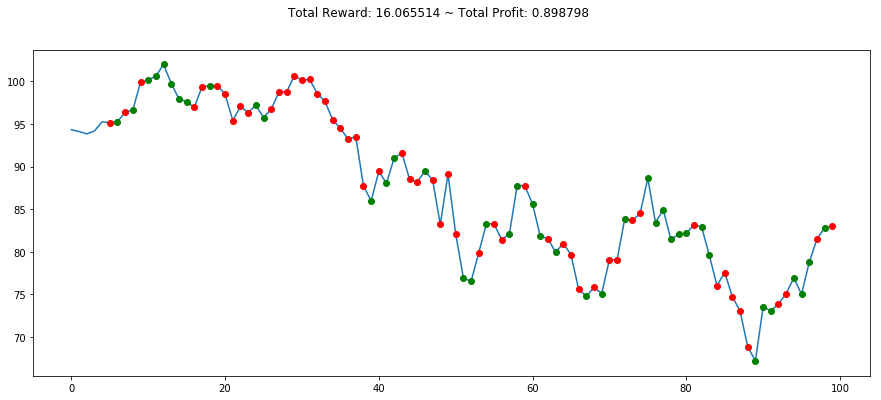

In [ ]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [ ]:
env_maker = lambda: gym.make('stocks-v0', df=AMZN, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [ ]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | 0.0108   |
| fps                | 13       |
| nupdates           | 1        |
| policy_entropy     | 0.689    |
| total_timesteps    | 5        |
| value_loss         | 0.72     |
---------------------------------
---------------------------------
| explained_variance | -0.00506 |
| fps                | 344      |
| nupdates           | 100      |
| policy_entropy     | 0.687    |
| total_timesteps    | 500      |
| value_loss         | 0.999    |
---------------------------------
---------------------------------
| explained_variance | 0.126    |
| fps                | 425     

---------------------------------
| explained_variance | -20      |
| fps                | 522      |
| nupdates           | 1700     |
| policy_entropy     | 0.0405   |
| total_timesteps    | 8500     |
| value_loss         | 8.04e-06 |
---------------------------------
---------------------------------
| explained_variance | -68.6    |
| fps                | 516      |
| nupdates           | 1800     |
| policy_entropy     | 0.0595   |
| total_timesteps    | 9000     |
| value_loss         | 0.000173 |
---------------------------------
----------------------------------
| explained_variance | -4.64e+03 |
| fps                | 510       |
| nupdates           | 1900      |
| policy_entropy     | 0.0606    |
| total_timesteps    | 9500      |
| value_loss         | 0.00149   |
----------------------------------
---------------------------------
| explained_variance | -0.285   |
| fps                | 512      |
| nupdates           | 2000     |
| policy_entropy     | 0.0271   |
| tota

---------------------------------
| explained_variance | -0.31    |
| fps                | 539      |
| nupdates           | 4800     |
| policy_entropy     | 0.0842   |
| total_timesteps    | 24000    |
| value_loss         | 0.000156 |
---------------------------------
---------------------------------
| explained_variance | -0.861   |
| fps                | 539      |
| nupdates           | 4900     |
| policy_entropy     | 0.0431   |
| total_timesteps    | 24500    |
| value_loss         | 7.53e-05 |
---------------------------------
---------------------------------
| explained_variance | -50.1    |
| fps                | 540      |
| nupdates           | 5000     |
| policy_entropy     | 0.024    |
| total_timesteps    | 25000    |
| value_loss         | 9.52e-07 |
---------------------------------
---------------------------------
| explained_variance | -17.8    |
| fps                | 540      |
| nupdates           | 5100     |
| policy_entropy     | 0.0194   |
| total_timest

----------------------------------
| explained_variance | -3.98e+05 |
| fps                | 551       |
| nupdates           | 7800      |
| policy_entropy     | 0.00243   |
| total_timesteps    | 39000     |
| value_loss         | 7e-06     |
----------------------------------
---------------------------------
| explained_variance | -317     |
| fps                | 551      |
| nupdates           | 7900     |
| policy_entropy     | 0.00141  |
| total_timesteps    | 39500    |
| value_loss         | 1.07e-06 |
---------------------------------
----------------------------------
| explained_variance | -4.72e+03 |
| fps                | 550       |
| nupdates           | 8000      |
| policy_entropy     | 0.00143   |
| total_timesteps    | 40000     |
| value_loss         | 3.8e-06   |
----------------------------------
----------------------------------
| explained_variance | -5.31e+03 |
| fps                | 550       |
| nupdates           | 8100      |
| policy_entropy     | 0.001

---------------------------------
| explained_variance | 0.0379   |
| fps                | 557      |
| nupdates           | 10800    |
| policy_entropy     | 0.00449  |
| total_timesteps    | 54000    |
| value_loss         | 1.87e-08 |
---------------------------------
---------------------------------
| explained_variance | -2.25    |
| fps                | 557      |
| nupdates           | 10900    |
| policy_entropy     | 0.0048   |
| total_timesteps    | 54500    |
| value_loss         | 2.05e-07 |
---------------------------------
----------------------------------
| explained_variance | -1.36e+03 |
| fps                | 557       |
| nupdates           | 11000     |
| policy_entropy     | 0.00626   |
| total_timesteps    | 55000     |
| value_loss         | 5.6e-06   |
----------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 557      |
| nupdates           | 11100    |
| policy_entropy     | 0.00553  |
| tota

---------------------------------
| explained_variance | -156     |
| fps                | 560      |
| nupdates           | 13800    |
| policy_entropy     | 0.0509   |
| total_timesteps    | 69000    |
| value_loss         | 3.08e-05 |
---------------------------------
---------------------------------
| explained_variance | 0.335    |
| fps                | 560      |
| nupdates           | 13900    |
| policy_entropy     | 0.00246  |
| total_timesteps    | 69500    |
| value_loss         | 2.59e-08 |
---------------------------------
---------------------------------
| explained_variance | -6.88    |
| fps                | 560      |
| nupdates           | 14000    |
| policy_entropy     | 0.00256  |
| total_timesteps    | 70000    |
| value_loss         | 1.3e-07  |
---------------------------------
---------------------------------
| explained_variance | nan      |
| fps                | 560      |
| nupdates           | 14100    |
| policy_entropy     | 0.00255  |
| total_timest

---------------------------------
| explained_variance | -47.2    |
| fps                | 562      |
| nupdates           | 16900    |
| policy_entropy     | 0.00201  |
| total_timesteps    | 84500    |
| value_loss         | 2.65e-07 |
---------------------------------
---------------------------------
| explained_variance | 0.0648   |
| fps                | 562      |
| nupdates           | 17000    |
| policy_entropy     | 0.00217  |
| total_timesteps    | 85000    |
| value_loss         | 1.47e-07 |
---------------------------------
---------------------------------
| explained_variance | -11.6    |
| fps                | 561      |
| nupdates           | 17100    |
| policy_entropy     | 0.00223  |
| total_timesteps    | 85500    |
| value_loss         | 1.41e-07 |
---------------------------------
---------------------------------
| explained_variance | -19.7    |
| fps                | 561      |
| nupdates           | 17200    |
| policy_entropy     | 0.00232  |
| total_timest

---------------------------------
| explained_variance | -1.34    |
| fps                | 554      |
| nupdates           | 20000    |
| policy_entropy     | 0.041    |
| total_timesteps    | 100000   |
| value_loss         | 1.51e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.953   |
| fps                | 554      |
| nupdates           | 20100    |
| policy_entropy     | 0.0258   |
| total_timesteps    | 100500   |
| value_loss         | 1.53e-06 |
---------------------------------
----------------------------------
| explained_variance | -0.000185 |
| fps                | 553       |
| nupdates           | 20200     |
| policy_entropy     | 0.185     |
| total_timesteps    | 101000    |
| value_loss         | 81.7      |
----------------------------------
---------------------------------
| explained_variance | 0.15     |
| fps                | 553      |
| nupdates           | 20300    |
| policy_entropy     | 0.0129   |
| tota

---------------------------------
| explained_variance | -0.348   |
| fps                | 546      |
| nupdates           | 23100    |
| policy_entropy     | 0.00432  |
| total_timesteps    | 115500   |
| value_loss         | 1.65e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.137   |
| fps                | 546      |
| nupdates           | 23200    |
| policy_entropy     | 0.457    |
| total_timesteps    | 116000   |
| value_loss         | 0.00165  |
---------------------------------
---------------------------------
| explained_variance | -9.56    |
| fps                | 546      |
| nupdates           | 23300    |
| policy_entropy     | 0.049    |
| total_timesteps    | 116500   |
| value_loss         | 1.1e-05  |
---------------------------------
---------------------------------
| explained_variance | 0.0669   |
| fps                | 546      |
| nupdates           | 23400    |
| policy_entropy     | 0.105    |
| total_timest

---------------------------------
| explained_variance | -0.122   |
| fps                | 545      |
| nupdates           | 26200    |
| policy_entropy     | 0.0396   |
| total_timesteps    | 131000   |
| value_loss         | 3.36e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.265   |
| fps                | 544      |
| nupdates           | 26300    |
| policy_entropy     | 0.0315   |
| total_timesteps    | 131500   |
| value_loss         | 4.01e-05 |
---------------------------------
----------------------------------
| explained_variance | -5.46e+04 |
| fps                | 545       |
| nupdates           | 26400     |
| policy_entropy     | 0.0347    |
| total_timesteps    | 132000    |
| value_loss         | 1.17e-05  |
----------------------------------
---------------------------------
| explained_variance | 0.334    |
| fps                | 544      |
| nupdates           | 26500    |
| policy_entropy     | 0.0499   |
| tota

---------------------------------
| explained_variance | -1.41    |
| fps                | 541      |
| nupdates           | 29300    |
| policy_entropy     | 0.115    |
| total_timesteps    | 146500   |
| value_loss         | 7.45e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.294   |
| fps                | 541      |
| nupdates           | 29400    |
| policy_entropy     | 0.219    |
| total_timesteps    | 147000   |
| value_loss         | 2.4e-05  |
---------------------------------
----------------------------------
| explained_variance | -4.61e+03 |
| fps                | 541       |
| nupdates           | 29500     |
| policy_entropy     | 0.177     |
| total_timesteps    | 147500    |
| value_loss         | 0.000385  |
----------------------------------
---------------------------------
| explained_variance | 0.0835   |
| fps                | 541      |
| nupdates           | 29600    |
| policy_entropy     | 0.159    |
| tota

----------------------------------
| explained_variance | -0.000135 |
| fps                | 538       |
| nupdates           | 32400     |
| policy_entropy     | 0.617     |
| total_timesteps    | 162000    |
| value_loss         | 6.82      |
----------------------------------
---------------------------------
| explained_variance | -0.00176 |
| fps                | 538      |
| nupdates           | 32500    |
| policy_entropy     | 0.692    |
| total_timesteps    | 162500   |
| value_loss         | 8.35     |
---------------------------------
---------------------------------
| explained_variance | 0.574    |
| fps                | 537      |
| nupdates           | 32600    |
| policy_entropy     | 0.598    |
| total_timesteps    | 163000   |
| value_loss         | 0.138    |
---------------------------------
---------------------------------
| explained_variance | -0.00131 |
| fps                | 537      |
| nupdates           | 32700    |
| policy_entropy     | 0.51     |
| tota

---------------------------------
| explained_variance | 0.00793  |
| fps                | 535      |
| nupdates           | 35500    |
| policy_entropy     | 0.577    |
| total_timesteps    | 177500   |
| value_loss         | 0.748    |
---------------------------------
---------------------------------
| explained_variance | 0.00758  |
| fps                | 535      |
| nupdates           | 35600    |
| policy_entropy     | 0.554    |
| total_timesteps    | 178000   |
| value_loss         | 1.75     |
---------------------------------
---------------------------------
| explained_variance | 0.565    |
| fps                | 535      |
| nupdates           | 35700    |
| policy_entropy     | 0.226    |
| total_timesteps    | 178500   |
| value_loss         | 0.000444 |
---------------------------------
---------------------------------
| explained_variance | 0.6      |
| fps                | 535      |
| nupdates           | 35800    |
| policy_entropy     | 0.415    |
| total_timest

---------------------------------
| explained_variance | 0.715    |
| fps                | 536      |
| nupdates           | 38600    |
| policy_entropy     | 0.298    |
| total_timesteps    | 193000   |
| value_loss         | 4.42e-05 |
---------------------------------
---------------------------------
| explained_variance | 0.4      |
| fps                | 535      |
| nupdates           | 38700    |
| policy_entropy     | 0.0936   |
| total_timesteps    | 193500   |
| value_loss         | 0.0005   |
---------------------------------
---------------------------------
| explained_variance | -0.123   |
| fps                | 535      |
| nupdates           | 38800    |
| policy_entropy     | 0.173    |
| total_timesteps    | 194000   |
| value_loss         | 6.53e-05 |
---------------------------------
---------------------------------
| explained_variance | 0.781    |
| fps                | 536      |
| nupdates           | 38900    |
| policy_entropy     | 0.11     |
| total_timest

---------------------------------
| explained_variance | 0.376    |
| fps                | 539      |
| nupdates           | 41700    |
| policy_entropy     | 0.663    |
| total_timesteps    | 208500   |
| value_loss         | 3.19     |
---------------------------------
---------------------------------
| explained_variance | 0.00558  |
| fps                | 539      |
| nupdates           | 41800    |
| policy_entropy     | 0.642    |
| total_timesteps    | 209000   |
| value_loss         | 1.13     |
---------------------------------
---------------------------------
| explained_variance | 0.000182 |
| fps                | 540      |
| nupdates           | 41900    |
| policy_entropy     | 0.646    |
| total_timesteps    | 209500   |
| value_loss         | 7.4      |
---------------------------------
---------------------------------
| explained_variance | 0.452    |
| fps                | 540      |
| nupdates           | 42000    |
| policy_entropy     | 0.548    |
| total_timest

---------------------------------
| explained_variance | 0.492    |
| fps                | 543      |
| nupdates           | 44800    |
| policy_entropy     | 0.15     |
| total_timesteps    | 224000   |
| value_loss         | 3.17e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.245   |
| fps                | 543      |
| nupdates           | 44900    |
| policy_entropy     | 0.166    |
| total_timesteps    | 224500   |
| value_loss         | 2.8e-05  |
---------------------------------
---------------------------------
| explained_variance | -0.669   |
| fps                | 543      |
| nupdates           | 45000    |
| policy_entropy     | 0.142    |
| total_timesteps    | 225000   |
| value_loss         | 0.000107 |
---------------------------------
---------------------------------
| explained_variance | -1.51    |
| fps                | 543      |
| nupdates           | 45100    |
| policy_entropy     | 0.213    |
| total_timest

---------------------------------
| explained_variance | -0.0365  |
| fps                | 546      |
| nupdates           | 47900    |
| policy_entropy     | 0.14     |
| total_timesteps    | 239500   |
| value_loss         | 5.83e-05 |
---------------------------------
---------------------------------
| explained_variance | 0.0737   |
| fps                | 546      |
| nupdates           | 48000    |
| policy_entropy     | 0.106    |
| total_timesteps    | 240000   |
| value_loss         | 8.77e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.126   |
| fps                | 546      |
| nupdates           | 48100    |
| policy_entropy     | 0.17     |
| total_timesteps    | 240500   |
| value_loss         | 7.55e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.101   |
| fps                | 546      |
| nupdates           | 48200    |
| policy_entropy     | 0.143    |
| total_timest

---------------------------------
| explained_variance | -1.37    |
| fps                | 548      |
| nupdates           | 51000    |
| policy_entropy     | 0.29     |
| total_timesteps    | 255000   |
| value_loss         | 2.45e-05 |
---------------------------------
----------------------------------
| explained_variance | -1.87e+03 |
| fps                | 549       |
| nupdates           | 51100     |
| policy_entropy     | 0.227     |
| total_timesteps    | 255500    |
| value_loss         | 0.0131    |
----------------------------------
---------------------------------
| explained_variance | -0.684   |
| fps                | 549      |
| nupdates           | 51200    |
| policy_entropy     | 0.213    |
| total_timesteps    | 256000   |
| value_loss         | 3.02e-08 |
---------------------------------
---------------------------------
| explained_variance | 0.0064   |
| fps                | 549      |
| nupdates           | 51300    |
| policy_entropy     | 0.219    |
| tota

---------------------------------
| explained_variance | -0.0236  |
| fps                | 551      |
| nupdates           | 54100    |
| policy_entropy     | 0.282    |
| total_timesteps    | 270500   |
| value_loss         | 3.27e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.0406  |
| fps                | 551      |
| nupdates           | 54200    |
| policy_entropy     | 0.416    |
| total_timesteps    | 271000   |
| value_loss         | 5.05e-06 |
---------------------------------
----------------------------------
| explained_variance | -2.79e-05 |
| fps                | 551       |
| nupdates           | 54300     |
| policy_entropy     | 0.68      |
| total_timesteps    | 271500    |
| value_loss         | 1.13      |
----------------------------------
---------------------------------
| explained_variance | 0.000762 |
| fps                | 551      |
| nupdates           | 54400    |
| policy_entropy     | 0.681    |
| tota

---------------------------------
| explained_variance | -0.0747  |
| fps                | 553      |
| nupdates           | 57200    |
| policy_entropy     | 0.00702  |
| total_timesteps    | 286000   |
| value_loss         | 2.09e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.155   |
| fps                | 553      |
| nupdates           | 57300    |
| policy_entropy     | 0.00743  |
| total_timesteps    | 286500   |
| value_loss         | 1.15e-08 |
---------------------------------
---------------------------------
| explained_variance | -2.42    |
| fps                | 554      |
| nupdates           | 57400    |
| policy_entropy     | 0.00789  |
| total_timesteps    | 287000   |
| value_loss         | 1.25e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.252   |
| fps                | 554      |
| nupdates           | 57500    |
| policy_entropy     | 0.0084   |
| total_timest

---------------------------------
| explained_variance | -0.128   |
| fps                | 555      |
| nupdates           | 60300    |
| policy_entropy     | 0.00953  |
| total_timesteps    | 301500   |
| value_loss         | 4.67e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.156   |
| fps                | 555      |
| nupdates           | 60400    |
| policy_entropy     | 0.0102   |
| total_timesteps    | 302000   |
| value_loss         | 2.89e-08 |
---------------------------------
----------------------------------
| explained_variance | -1.15e+03 |
| fps                | 555       |
| nupdates           | 60500     |
| policy_entropy     | 0.0113    |
| total_timesteps    | 302500    |
| value_loss         | 8.06e-05  |
----------------------------------
---------------------------------
| explained_variance | -0.166   |
| fps                | 555      |
| nupdates           | 60600    |
| policy_entropy     | 0.0074   |
| tota

---------------------------------
| explained_variance | -0.151   |
| fps                | 556      |
| nupdates           | 63400    |
| policy_entropy     | 0.00555  |
| total_timesteps    | 317000   |
| value_loss         | 2.68e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.087   |
| fps                | 556      |
| nupdates           | 63500    |
| policy_entropy     | 0.00573  |
| total_timesteps    | 317500   |
| value_loss         | 7.98e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0457  |
| fps                | 556      |
| nupdates           | 63600    |
| policy_entropy     | 0.00382  |
| total_timesteps    | 318000   |
| value_loss         | 2.46e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.0404  |
| fps                | 556      |
| nupdates           | 63700    |
| policy_entropy     | 0.00234  |
| total_timest

---------------------------------
| explained_variance | -0.0248  |
| fps                | 557      |
| nupdates           | 66500    |
| policy_entropy     | 0.00135  |
| total_timesteps    | 332500   |
| value_loss         | 2.14e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.0279  |
| fps                | 557      |
| nupdates           | 66600    |
| policy_entropy     | 0.00137  |
| total_timesteps    | 333000   |
| value_loss         | 9.74e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0535  |
| fps                | 557      |
| nupdates           | 66700    |
| policy_entropy     | 0.00138  |
| total_timesteps    | 333500   |
| value_loss         | 4.54e-08 |
---------------------------------
---------------------------------
| explained_variance | 0.304    |
| fps                | 557      |
| nupdates           | 66800    |
| policy_entropy     | 0.00141  |
| total_timest

---------------------------------
| explained_variance | -13.3    |
| fps                | 558      |
| nupdates           | 69600    |
| policy_entropy     | 0.00139  |
| total_timesteps    | 348000   |
| value_loss         | 6.43e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.0526  |
| fps                | 558      |
| nupdates           | 69700    |
| policy_entropy     | 0.00141  |
| total_timesteps    | 348500   |
| value_loss         | 9.92e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0538  |
| fps                | 558      |
| nupdates           | 69800    |
| policy_entropy     | 0.00143  |
| total_timesteps    | 349000   |
| value_loss         | 4.42e-08 |
---------------------------------
----------------------------------
| explained_variance | -2.82e+03 |
| fps                | 558       |
| nupdates           | 69900     |
| policy_entropy     | 0.00151   |
| total_t

---------------------------------
| explained_variance | -0.00722 |
| fps                | 558      |
| nupdates           | 72700    |
| policy_entropy     | 0.00207  |
| total_timesteps    | 363500   |
| value_loss         | 4.15e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.0604  |
| fps                | 558      |
| nupdates           | 72800    |
| policy_entropy     | 0.00249  |
| total_timesteps    | 364000   |
| value_loss         | 8.46e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0636  |
| fps                | 558      |
| nupdates           | 72900    |
| policy_entropy     | 0.00255  |
| total_timesteps    | 364500   |
| value_loss         | 3.93e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0736  |
| fps                | 558      |
| nupdates           | 73000    |
| policy_entropy     | 0.00262  |
| total_timest

---------------------------------
| explained_variance | -0.0971  |
| fps                | 559      |
| nupdates           | 75800    |
| policy_entropy     | 0.00522  |
| total_timesteps    | 379000   |
| value_loss         | 2.51e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0601  |
| fps                | 559      |
| nupdates           | 75900    |
| policy_entropy     | 0.00341  |
| total_timesteps    | 379500   |
| value_loss         | 6.48e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.032   |
| fps                | 559      |
| nupdates           | 76000    |
| policy_entropy     | 0.00352  |
| total_timesteps    | 380000   |
| value_loss         | 3.95e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.08    |
| fps                | 559      |
| nupdates           | 76100    |
| policy_entropy     | 0.00363  |
| total_timest

---------------------------------
| explained_variance | -0.0574  |
| fps                | 560      |
| nupdates           | 78900    |
| policy_entropy     | 0.00142  |
| total_timesteps    | 394500   |
| value_loss         | 5.43e-08 |
---------------------------------
---------------------------------
| explained_variance | -9.78    |
| fps                | 560      |
| nupdates           | 79000    |
| policy_entropy     | 0.00145  |
| total_timesteps    | 395000   |
| value_loss         | 3.52e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.0508  |
| fps                | 560      |
| nupdates           | 79100    |
| policy_entropy     | 0.00147  |
| total_timesteps    | 395500   |
| value_loss         | 7.49e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0525  |
| fps                | 560      |
| nupdates           | 79200    |
| policy_entropy     | 0.00149  |
| total_timest

---------------------------------
| explained_variance | -0.0534  |
| fps                | 560      |
| nupdates           | 82000    |
| policy_entropy     | 0.00157  |
| total_timesteps    | 410000   |
| value_loss         | 5.84e-08 |
---------------------------------
---------------------------------
| explained_variance | 0.684    |
| fps                | 560      |
| nupdates           | 82100    |
| policy_entropy     | 0.00141  |
| total_timesteps    | 410500   |
| value_loss         | 3.21e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.054   |
| fps                | 560      |
| nupdates           | 82200    |
| policy_entropy     | 0.00162  |
| total_timesteps    | 411000   |
| value_loss         | 7.67e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0534  |
| fps                | 560      |
| nupdates           | 82300    |
| policy_entropy     | 0.00165  |
| total_timest

---------------------------------
| explained_variance | -0.0564  |
| fps                | 561      |
| nupdates           | 85100    |
| policy_entropy     | 0.000989 |
| total_timesteps    | 425500   |
| value_loss         | 7.03e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0439  |
| fps                | 561      |
| nupdates           | 85200    |
| policy_entropy     | 0.001    |
| total_timesteps    | 426000   |
| value_loss         | 3.25e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0536  |
| fps                | 561      |
| nupdates           | 85300    |
| policy_entropy     | 0.00101  |
| total_timesteps    | 426500   |
| value_loss         | 9.77e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0382  |
| fps                | 561      |
| nupdates           | 85400    |
| policy_entropy     | 0.00165  |
| total_timest

---------------------------------
| explained_variance | -0.0304  |
| fps                | 562      |
| nupdates           | 88200    |
| policy_entropy     | 0.00145  |
| total_timesteps    | 441000   |
| value_loss         | 7.58e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0598  |
| fps                | 562      |
| nupdates           | 88300    |
| policy_entropy     | 0.00148  |
| total_timesteps    | 441500   |
| value_loss         | 3.78e-08 |
---------------------------------
---------------------------------
| explained_variance | -15.9    |
| fps                | 562      |
| nupdates           | 88400    |
| policy_entropy     | 0.00228  |
| total_timesteps    | 442000   |
| value_loss         | 1.97e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.0631  |
| fps                | 562      |
| nupdates           | 88500    |
| policy_entropy     | 0.00232  |
| total_timest

---------------------------------
| explained_variance | -0.0576  |
| fps                | 562      |
| nupdates           | 91300    |
| policy_entropy     | 0.00258  |
| total_timesteps    | 456500   |
| value_loss         | 6.15e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0658  |
| fps                | 562      |
| nupdates           | 91400    |
| policy_entropy     | 0.00265  |
| total_timesteps    | 457000   |
| value_loss         | 3.06e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.488   |
| fps                | 562      |
| nupdates           | 91500    |
| policy_entropy     | 0.00232  |
| total_timesteps    | 457500   |
| value_loss         | 2.56e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.0688  |
| fps                | 562      |
| nupdates           | 91600    |
| policy_entropy     | 0.00279  |
| total_timest

---------------------------------
| explained_variance | -0.0533  |
| fps                | 563      |
| nupdates           | 94400    |
| policy_entropy     | 0.00107  |
| total_timesteps    | 472000   |
| value_loss         | 1.54e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.0613  |
| fps                | 563      |
| nupdates           | 94500    |
| policy_entropy     | 0.00108  |
| total_timesteps    | 472500   |
| value_loss         | 6.77e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.046   |
| fps                | 563      |
| nupdates           | 94600    |
| policy_entropy     | 0.0011   |
| total_timesteps    | 473000   |
| value_loss         | 2.9e-08  |
---------------------------------
---------------------------------
| explained_variance | -0.0685  |
| fps                | 563      |
| nupdates           | 94700    |
| policy_entropy     | 0.00111  |
| total_timest

---------------------------------
| explained_variance | 0.227    |
| fps                | 563      |
| nupdates           | 97500    |
| policy_entropy     | 0.00226  |
| total_timesteps    | 487500   |
| value_loss         | 1.59e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0294  |
| fps                | 564      |
| nupdates           | 97600    |
| policy_entropy     | 0.00231  |
| total_timesteps    | 488000   |
| value_loss         | 1.2e-08  |
---------------------------------
---------------------------------
| explained_variance | -0.0972  |
| fps                | 564      |
| nupdates           | 97700    |
| policy_entropy     | 0.00236  |
| total_timesteps    | 488500   |
| value_loss         | 9.79e-09 |
---------------------------------
---------------------------------
| explained_variance | -23.1    |
| fps                | 564      |
| nupdates           | 97800    |
| policy_entropy     | 0.00243  |
| total_timest

----------------------------------
| explained_variance | -2.99e+04 |
| fps                | 564       |
| nupdates           | 100600    |
| policy_entropy     | 0.00199   |
| total_timesteps    | 503000    |
| value_loss         | 3e-05     |
----------------------------------
---------------------------------
| explained_variance | -0.0522  |
| fps                | 564      |
| nupdates           | 100700   |
| policy_entropy     | 0.00203  |
| total_timesteps    | 503500   |
| value_loss         | 6.04e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0634  |
| fps                | 564      |
| nupdates           | 100800   |
| policy_entropy     | 0.00207  |
| total_timesteps    | 504000   |
| value_loss         | 2.81e-08 |
---------------------------------
---------------------------------
| explained_variance | 0.186    |
| fps                | 564      |
| nupdates           | 100900   |
| policy_entropy     | 0.00183  |
| tota

---------------------------------
| explained_variance | -0.169   |
| fps                | 565      |
| nupdates           | 103700   |
| policy_entropy     | 0.0129   |
| total_timesteps    | 518500   |
| value_loss         | 5.43e-08 |
---------------------------------
---------------------------------
| explained_variance | 0.853    |
| fps                | 565      |
| nupdates           | 103800   |
| policy_entropy     | 0.00979  |
| total_timesteps    | 519000   |
| value_loss         | 4.7e-11  |
---------------------------------
---------------------------------
| explained_variance | -2.46    |
| fps                | 565      |
| nupdates           | 103900   |
| policy_entropy     | 0.0105   |
| total_timesteps    | 519500   |
| value_loss         | 3.76e-10 |
---------------------------------
---------------------------------
| explained_variance | -0.926   |
| fps                | 564      |
| nupdates           | 104000   |
| policy_entropy     | 0.0115   |
| total_timest

---------------------------------
| explained_variance | -0.161   |
| fps                | 565      |
| nupdates           | 106800   |
| policy_entropy     | 0.00575  |
| total_timesteps    | 534000   |
| value_loss         | 7.39e-09 |
---------------------------------
---------------------------------
| explained_variance | 0.0473   |
| fps                | 565      |
| nupdates           | 106900   |
| policy_entropy     | 0.00603  |
| total_timesteps    | 534500   |
| value_loss         | 1.6e-08  |
---------------------------------
---------------------------------
| explained_variance | -0.106   |
| fps                | 565      |
| nupdates           | 107000   |
| policy_entropy     | 0.00636  |
| total_timesteps    | 535000   |
| value_loss         | 9.69e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.211   |
| fps                | 565      |
| nupdates           | 107100   |
| policy_entropy     | 0.00674  |
| total_timest

---------------------------------
| explained_variance | -0.112   |
| fps                | 564      |
| nupdates           | 109900   |
| policy_entropy     | 0.0044   |
| total_timesteps    | 549500   |
| value_loss         | 1.38e-08 |
---------------------------------
----------------------------------
| explained_variance | -6.75e+03 |
| fps                | 564       |
| nupdates           | 110000    |
| policy_entropy     | 0.00268   |
| total_timesteps    | 550000    |
| value_loss         | 6.2e-05   |
----------------------------------
---------------------------------
| explained_variance | -0.0577  |
| fps                | 564      |
| nupdates           | 110100   |
| policy_entropy     | 0.00273  |
| total_timesteps    | 550500   |
| value_loss         | 7.95e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0683  |
| fps                | 564      |
| nupdates           | 110200   |
| policy_entropy     | 0.0028   |
| tota

---------------------------------
| explained_variance | -0.046   |
| fps                | 564      |
| nupdates           | 113000   |
| policy_entropy     | 0.00117  |
| total_timesteps    | 565000   |
| value_loss         | 2.94e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.152   |
| fps                | 564      |
| nupdates           | 113100   |
| policy_entropy     | 0.00118  |
| total_timesteps    | 565500   |
| value_loss         | 1.3e-08  |
---------------------------------
---------------------------------
| explained_variance | -0.0558  |
| fps                | 564      |
| nupdates           | 113200   |
| policy_entropy     | 0.0012   |
| total_timesteps    | 566000   |
| value_loss         | 1.31e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.0658  |
| fps                | 564      |
| nupdates           | 113300   |
| policy_entropy     | 0.00121  |
| total_timest

---------------------------------
| explained_variance | -0.197   |
| fps                | 565      |
| nupdates           | 116100   |
| policy_entropy     | 0.00219  |
| total_timesteps    | 580500   |
| value_loss         | 1.97e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.084   |
| fps                | 565      |
| nupdates           | 116200   |
| policy_entropy     | 0.00224  |
| total_timesteps    | 581000   |
| value_loss         | 8.43e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.042   |
| fps                | 565      |
| nupdates           | 116300   |
| policy_entropy     | 0.00229  |
| total_timesteps    | 581500   |
| value_loss         | 9.7e-08  |
---------------------------------
---------------------------------
| explained_variance | -0.0414  |
| fps                | 565      |
| nupdates           | 116400   |
| policy_entropy     | 0.00235  |
| total_timest

---------------------------------
| explained_variance | -0.0733  |
| fps                | 565      |
| nupdates           | 119200   |
| policy_entropy     | 0.00238  |
| total_timesteps    | 596000   |
| value_loss         | 1.96e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0838  |
| fps                | 565      |
| nupdates           | 119300   |
| policy_entropy     | 0.00244  |
| total_timesteps    | 596500   |
| value_loss         | 8.8e-09  |
---------------------------------
----------------------------------
| explained_variance | -4.84e+04 |
| fps                | 565       |
| nupdates           | 119400    |
| policy_entropy     | 0.00252   |
| total_timesteps    | 597000    |
| value_loss         | 2.44e-05  |
----------------------------------
---------------------------------
| explained_variance | -0.0586  |
| fps                | 565      |
| nupdates           | 119500   |
| policy_entropy     | 0.00257  |
| tota

---------------------------------
| explained_variance | -0.0919  |
| fps                | 565      |
| nupdates           | 122300   |
| policy_entropy     | 0.00262  |
| total_timesteps    | 611500   |
| value_loss         | 1.7e-08  |
---------------------------------
---------------------------------
| explained_variance | -0.087   |
| fps                | 565      |
| nupdates           | 122400   |
| policy_entropy     | 0.00269  |
| total_timesteps    | 612000   |
| value_loss         | 7.43e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.336   |
| fps                | 565      |
| nupdates           | 122500   |
| policy_entropy     | 0.00277  |
| total_timesteps    | 612500   |
| value_loss         | 3.48e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.0933  |
| fps                | 565      |
| nupdates           | 122600   |
| policy_entropy     | 0.00285  |
| total_timest

---------------------------------
| explained_variance | -0.208   |
| fps                | 565      |
| nupdates           | 125400   |
| policy_entropy     | 0.00109  |
| total_timesteps    | 627000   |
| value_loss         | 4.28e-08 |
---------------------------------
---------------------------------
| explained_variance | 0.00933  |
| fps                | 565      |
| nupdates           | 125500   |
| policy_entropy     | 0.00172  |
| total_timesteps    | 627500   |
| value_loss         | 2.1e-07  |
---------------------------------
---------------------------------
| explained_variance | -0.0879  |
| fps                | 565      |
| nupdates           | 125600   |
| policy_entropy     | 0.00175  |
| total_timesteps    | 628000   |
| value_loss         | 4.35e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.362   |
| fps                | 565      |
| nupdates           | 125700   |
| policy_entropy     | 0.00178  |
| total_timest

---------------------------------
| explained_variance | -147     |
| fps                | 565      |
| nupdates           | 128500   |
| policy_entropy     | 0.00217  |
| total_timesteps    | 642500   |
| value_loss         | 7.25e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.0757  |
| fps                | 565      |
| nupdates           | 128600   |
| policy_entropy     | 0.00219  |
| total_timesteps    | 643000   |
| value_loss         | 1.35e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0847  |
| fps                | 565      |
| nupdates           | 128700   |
| policy_entropy     | 0.00224  |
| total_timesteps    | 643500   |
| value_loss         | 5.98e-09 |
---------------------------------
----------------------------------
| explained_variance | -2.41e+05 |
| fps                | 565       |
| nupdates           | 128800    |
| policy_entropy     | 0.00233   |
| total_t

---------------------------------
| explained_variance | nan      |
| fps                | 565      |
| nupdates           | 131600   |
| policy_entropy     | 0.00707  |
| total_timesteps    | 658000   |
| value_loss         | 0.000693 |
---------------------------------
---------------------------------
| explained_variance | -0.286   |
| fps                | 565      |
| nupdates           | 131700   |
| policy_entropy     | 0.00752  |
| total_timesteps    | 658500   |
| value_loss         | 5.13e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.329   |
| fps                | 565      |
| nupdates           | 131800   |
| policy_entropy     | 0.00805  |
| total_timesteps    | 659000   |
| value_loss         | 3e-09    |
---------------------------------
---------------------------------
| explained_variance | -0.877   |
| fps                | 565      |
| nupdates           | 131900   |
| policy_entropy     | 0.00867  |
| total_timest

---------------------------------
| explained_variance | -0.141   |
| fps                | 566      |
| nupdates           | 134700   |
| policy_entropy     | 0.00717  |
| total_timesteps    | 673500   |
| value_loss         | 9.12e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.113   |
| fps                | 566      |
| nupdates           | 134800   |
| policy_entropy     | 0.00907  |
| total_timesteps    | 674000   |
| value_loss         | 4.15e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.443   |
| fps                | 566      |
| nupdates           | 134900   |
| policy_entropy     | 0.00972  |
| total_timesteps    | 674500   |
| value_loss         | 9.12e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.1     |
| fps                | 566      |
| nupdates           | 135000   |
| policy_entropy     | 0.0066   |
| total_timest

----------------------------------
| explained_variance | -2.48e-05 |
| fps                | 566       |
| nupdates           | 137800    |
| policy_entropy     | 0.011     |
| total_timesteps    | 689000    |
| value_loss         | 168       |
----------------------------------
---------------------------------
| explained_variance | -133     |
| fps                | 566      |
| nupdates           | 137900   |
| policy_entropy     | 0.00859  |
| total_timesteps    | 689500   |
| value_loss         | 1.62e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.0897  |
| fps                | 566      |
| nupdates           | 138000   |
| policy_entropy     | 0.00632  |
| total_timesteps    | 690000   |
| value_loss         | 6.55e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.111   |
| fps                | 566      |
| nupdates           | 138100   |
| policy_entropy     | 0.00669  |
| tota

---------------------------------
| explained_variance | -0.151   |
| fps                | 566      |
| nupdates           | 140900   |
| policy_entropy     | 0.00729  |
| total_timesteps    | 704500   |
| value_loss         | 1.51e-08 |
---------------------------------
---------------------------------
| explained_variance | nan      |
| fps                | 566      |
| nupdates           | 141000   |
| policy_entropy     | 0.00781  |
| total_timesteps    | 705000   |
| value_loss         | 5.86e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.153   |
| fps                | 566      |
| nupdates           | 141100   |
| policy_entropy     | 0.00841  |
| total_timesteps    | 705500   |
| value_loss         | 2.95e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.612   |
| fps                | 566      |
| nupdates           | 141200   |
| policy_entropy     | 0.016    |
| total_timest

---------------------------------
| explained_variance | -0.124   |
| fps                | 566      |
| nupdates           | 144000   |
| policy_entropy     | 0.0111   |
| total_timesteps    | 720000   |
| value_loss         | 1.21e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0321  |
| fps                | 567      |
| nupdates           | 144100   |
| policy_entropy     | 0.00709  |
| total_timesteps    | 720500   |
| value_loss         | 6.12e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.0741  |
| fps                | 567      |
| nupdates           | 144200   |
| policy_entropy     | 0.0052   |
| total_timesteps    | 721000   |
| value_loss         | 1.35e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.0897  |
| fps                | 566      |
| nupdates           | 144300   |
| policy_entropy     | 0.00352  |
| total_timest

---------------------------------
| explained_variance | -0.0484  |
| fps                | 567      |
| nupdates           | 147100   |
| policy_entropy     | 0.00154  |
| total_timesteps    | 735500   |
| value_loss         | 8.12e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0319  |
| fps                | 567      |
| nupdates           | 147200   |
| policy_entropy     | 0.00156  |
| total_timesteps    | 736000   |
| value_loss         | 3.2e-08  |
---------------------------------
---------------------------------
| explained_variance | -47.3    |
| fps                | 567      |
| nupdates           | 147300   |
| policy_entropy     | 0.00162  |
| total_timesteps    | 736500   |
| value_loss         | 7.98e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.0558  |
| fps                | 567      |
| nupdates           | 147400   |
| policy_entropy     | 0.00162  |
| total_timest

---------------------------------
| explained_variance | -0.12    |
| fps                | 567      |
| nupdates           | 150200   |
| policy_entropy     | 0.00251  |
| total_timesteps    | 751000   |
| value_loss         | 5.21e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.115   |
| fps                | 567      |
| nupdates           | 150300   |
| policy_entropy     | 0.00258  |
| total_timesteps    | 751500   |
| value_loss         | 2.91e-09 |
---------------------------------
---------------------------------
| explained_variance | nan      |
| fps                | 567      |
| nupdates           | 150400   |
| policy_entropy     | 0.00266  |
| total_timesteps    | 752000   |
| value_loss         | 1.22e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.104   |
| fps                | 567      |
| nupdates           | 150500   |
| policy_entropy     | 0.00274  |
| total_timest

---------------------------------
| explained_variance | -0.18    |
| fps                | 567      |
| nupdates           | 153300   |
| policy_entropy     | 0.00177  |
| total_timesteps    | 766500   |
| value_loss         | 1.71e-08 |
---------------------------------
---------------------------------
| explained_variance | 0.239    |
| fps                | 567      |
| nupdates           | 153400   |
| policy_entropy     | 0.00181  |
| total_timesteps    | 767000   |
| value_loss         | 5.56e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.0144  |
| fps                | 567      |
| nupdates           | 153500   |
| policy_entropy     | 0.00184  |
| total_timesteps    | 767500   |
| value_loss         | 2.42e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.456   |
| fps                | 567      |
| nupdates           | 153600   |
| policy_entropy     | 0.00188  |
| total_timest

---------------------------------
| explained_variance | 0.991    |
| fps                | 568      |
| nupdates           | 156400   |
| policy_entropy     | 0.00889  |
| total_timesteps    | 782000   |
| value_loss         | 1.14e-10 |
---------------------------------
---------------------------------
| explained_variance | -8.66    |
| fps                | 568      |
| nupdates           | 156500   |
| policy_entropy     | 0.00964  |
| total_timesteps    | 782500   |
| value_loss         | 6.14e-11 |
---------------------------------
---------------------------------
| explained_variance | -0.247   |
| fps                | 568      |
| nupdates           | 156600   |
| policy_entropy     | 0.00704  |
| total_timesteps    | 783000   |
| value_loss         | 3.73e-09 |
---------------------------------
---------------------------------
| explained_variance | -80.2    |
| fps                | 568      |
| nupdates           | 156700   |
| policy_entropy     | 0.0076   |
| total_timest

---------------------------------
| explained_variance | -7.21    |
| fps                | 568      |
| nupdates           | 159500   |
| policy_entropy     | 0.00194  |
| total_timesteps    | 797500   |
| value_loss         | 1.12e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.047   |
| fps                | 568      |
| nupdates           | 159600   |
| policy_entropy     | 0.00107  |
| total_timesteps    | 798000   |
| value_loss         | 8.54e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0434  |
| fps                | 568      |
| nupdates           | 159700   |
| policy_entropy     | 0.00108  |
| total_timesteps    | 798500   |
| value_loss         | 3.9e-08  |
---------------------------------
---------------------------------
| explained_variance | nan      |
| fps                | 568      |
| nupdates           | 159800   |
| policy_entropy     | 0.00109  |
| total_timest

---------------------------------
| explained_variance | -0.696   |
| fps                | 568      |
| nupdates           | 162600   |
| policy_entropy     | 0.00217  |
| total_timesteps    | 813000   |
| value_loss         | 1.38e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.154   |
| fps                | 568      |
| nupdates           | 162700   |
| policy_entropy     | 0.00222  |
| total_timesteps    | 813500   |
| value_loss         | 2.89e-08 |
---------------------------------
---------------------------------
| explained_variance | 0.166    |
| fps                | 568      |
| nupdates           | 162800   |
| policy_entropy     | 0.00228  |
| total_timesteps    | 814000   |
| value_loss         | 1.03e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0306  |
| fps                | 568      |
| nupdates           | 162900   |
| policy_entropy     | 0.00234  |
| total_timest

---------------------------------
| explained_variance | -0.658   |
| fps                | 568      |
| nupdates           | 165700   |
| policy_entropy     | 0.00591  |
| total_timesteps    | 828500   |
| value_loss         | 9.52e-10 |
---------------------------------
---------------------------------
| explained_variance | -0.715   |
| fps                | 568      |
| nupdates           | 165800   |
| policy_entropy     | 0.00378  |
| total_timesteps    | 829000   |
| value_loss         | 1.01e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.0615  |
| fps                | 568      |
| nupdates           | 165900   |
| policy_entropy     | 0.00259  |
| total_timesteps    | 829500   |
| value_loss         | 5.71e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.054   |
| fps                | 568      |
| nupdates           | 166000   |
| policy_entropy     | 0.00267  |
| total_timest

---------------------------------
| explained_variance | -0.0945  |
| fps                | 569      |
| nupdates           | 168800   |
| policy_entropy     | 0.00126  |
| total_timesteps    | 844000   |
| value_loss         | 2.88e-08 |
---------------------------------
---------------------------------
| explained_variance | -101     |
| fps                | 569      |
| nupdates           | 168900   |
| policy_entropy     | 0.0014   |
| total_timesteps    | 844500   |
| value_loss         | 3.7e-05  |
---------------------------------
---------------------------------
| explained_variance | -0.0474  |
| fps                | 569      |
| nupdates           | 169000   |
| policy_entropy     | 0.0013   |
| total_timesteps    | 845000   |
| value_loss         | 1.01e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.0449  |
| fps                | 569      |
| nupdates           | 169100   |
| policy_entropy     | 0.00132  |
| total_timest

---------------------------------
| explained_variance | -0.279   |
| fps                | 569      |
| nupdates           | 171900   |
| policy_entropy     | 0.000938 |
| total_timesteps    | 859500   |
| value_loss         | 1.74e-09 |
---------------------------------
---------------------------------
| explained_variance | -3.23    |
| fps                | 569      |
| nupdates           | 172000   |
| policy_entropy     | 0.000949 |
| total_timesteps    | 860000   |
| value_loss         | 8.05e-10 |
---------------------------------
---------------------------------
| explained_variance | -0.145   |
| fps                | 569      |
| nupdates           | 172100   |
| policy_entropy     | 0.000961 |
| total_timesteps    | 860500   |
| value_loss         | 2.58e-08 |
---------------------------------
---------------------------------
| explained_variance | 0.106    |
| fps                | 569      |
| nupdates           | 172200   |
| policy_entropy     | 0.000972 |
| total_timest

---------------------------------
| explained_variance | -4.39    |
| fps                | 569      |
| nupdates           | 175000   |
| policy_entropy     | 0.00146  |
| total_timesteps    | 875000   |
| value_loss         | 1.84e-11 |
---------------------------------
---------------------------------
| explained_variance | -0.14    |
| fps                | 569      |
| nupdates           | 175100   |
| policy_entropy     | 0.000884 |
| total_timesteps    | 875500   |
| value_loss         | 3.47e-09 |
---------------------------------
---------------------------------
| explained_variance | -2.63    |
| fps                | 569      |
| nupdates           | 175200   |
| policy_entropy     | 0.000896 |
| total_timesteps    | 876000   |
| value_loss         | 1.19e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.0681  |
| fps                | 569      |
| nupdates           | 175300   |
| policy_entropy     | 0.000904 |
| total_timest

---------------------------------
| explained_variance | 0.459    |
| fps                | 569      |
| nupdates           | 178100   |
| policy_entropy     | 0.00157  |
| total_timesteps    | 890500   |
| value_loss         | 2.36e-10 |
---------------------------------
---------------------------------
| explained_variance | -1.1     |
| fps                | 569      |
| nupdates           | 178200   |
| policy_entropy     | 0.00159  |
| total_timesteps    | 891000   |
| value_loss         | 1.62e-10 |
---------------------------------
---------------------------------
| explained_variance | -9.74    |
| fps                | 569      |
| nupdates           | 178300   |
| policy_entropy     | 0.00173  |
| total_timesteps    | 891500   |
| value_loss         | 5.14e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.151   |
| fps                | 569      |
| nupdates           | 178400   |
| policy_entropy     | 0.00166  |
| total_timest

---------------------------------
| explained_variance | -0.451   |
| fps                | 569      |
| nupdates           | 181200   |
| policy_entropy     | 0.000798 |
| total_timesteps    | 906000   |
| value_loss         | 3.36e-10 |
---------------------------------
---------------------------------
| explained_variance | -0.982   |
| fps                | 569      |
| nupdates           | 181300   |
| policy_entropy     | 0.000807 |
| total_timesteps    | 906500   |
| value_loss         | 1.34e-10 |
---------------------------------
---------------------------------
| explained_variance | -29.9    |
| fps                | 569      |
| nupdates           | 181400   |
| policy_entropy     | 0.000815 |
| total_timesteps    | 907000   |
| value_loss         | 1.81e-10 |
---------------------------------
---------------------------------
| explained_variance | -0.23    |
| fps                | 569      |
| nupdates           | 181500   |
| policy_entropy     | 0.000824 |
| total_timest

---------------------------------
| explained_variance | -19.6    |
| fps                | 569      |
| nupdates           | 184300   |
| policy_entropy     | 0.000604 |
| total_timesteps    | 921500   |
| value_loss         | 4.69e-09 |
---------------------------------
---------------------------------
| explained_variance | -2.07    |
| fps                | 569      |
| nupdates           | 184400   |
| policy_entropy     | 0.000608 |
| total_timesteps    | 922000   |
| value_loss         | 6.18e-11 |
---------------------------------
---------------------------------
| explained_variance | -1.54    |
| fps                | 569      |
| nupdates           | 184500   |
| policy_entropy     | 0.000613 |
| total_timesteps    | 922500   |
| value_loss         | 2.88e-11 |
---------------------------------
---------------------------------
| explained_variance | -8.79    |
| fps                | 569      |
| nupdates           | 184600   |
| policy_entropy     | 0.00062  |
| total_timest

----------------------------------
| explained_variance | -4.74e+03 |
| fps                | 569       |
| nupdates           | 187400    |
| policy_entropy     | 0.00038   |
| total_timesteps    | 937000    |
| value_loss         | 3.76e-06  |
----------------------------------
---------------------------------
| explained_variance | 0.441    |
| fps                | 569      |
| nupdates           | 187500   |
| policy_entropy     | 0.000353 |
| total_timesteps    | 937500   |
| value_loss         | 3.27e-10 |
---------------------------------
---------------------------------
| explained_variance | -7.07    |
| fps                | 569      |
| nupdates           | 187600   |
| policy_entropy     | 0.000354 |
| total_timesteps    | 938000   |
| value_loss         | 2.1e-10  |
---------------------------------
---------------------------------
| explained_variance | -35      |
| fps                | 569      |
| nupdates           | 187700   |
| policy_entropy     | 0.000464 |
| tota

---------------------------------
| explained_variance | -7.36    |
| fps                | 569      |
| nupdates           | 190500   |
| policy_entropy     | 0.00069  |
| total_timesteps    | 952500   |
| value_loss         | 6.54e-10 |
---------------------------------
---------------------------------
| explained_variance | 0.0296   |
| fps                | 569      |
| nupdates           | 190600   |
| policy_entropy     | 0.000697 |
| total_timesteps    | 953000   |
| value_loss         | 7.7e-09  |
---------------------------------
---------------------------------
| explained_variance | 0.0363   |
| fps                | 569      |
| nupdates           | 190700   |
| policy_entropy     | 0.000703 |
| total_timesteps    | 953500   |
| value_loss         | 2.71e-09 |
---------------------------------
---------------------------------
| explained_variance | 0.688    |
| fps                | 569      |
| nupdates           | 190800   |
| policy_entropy     | 0.00071  |
| total_timest

---------------------------------
| explained_variance | -0.0123  |
| fps                | 569      |
| nupdates           | 193600   |
| policy_entropy     | 0.000953 |
| total_timesteps    | 968000   |
| value_loss         | 7.98e-11 |
---------------------------------
---------------------------------
| explained_variance | 0.941    |
| fps                | 569      |
| nupdates           | 193700   |
| policy_entropy     | 0.000964 |
| total_timesteps    | 968500   |
| value_loss         | 9.37e-10 |
---------------------------------
---------------------------------
| explained_variance | 0.0722   |
| fps                | 569      |
| nupdates           | 193800   |
| policy_entropy     | 0.000976 |
| total_timesteps    | 969000   |
| value_loss         | 3.09e-09 |
---------------------------------
---------------------------------
| explained_variance | 0.126    |
| fps                | 569      |
| nupdates           | 193900   |
| policy_entropy     | 0.000988 |
| total_timest

---------------------------------
| explained_variance | -22.6    |
| fps                | 569      |
| nupdates           | 196700   |
| policy_entropy     | 0.000743 |
| total_timesteps    | 983500   |
| value_loss         | 4.12e-10 |
---------------------------------
----------------------------------
| explained_variance | -1.89e+03 |
| fps                | 569       |
| nupdates           | 196800    |
| policy_entropy     | 0.000805  |
| total_timesteps    | 984000    |
| value_loss         | 2.36e-06  |
----------------------------------
---------------------------------
| explained_variance | 0.15     |
| fps                | 569      |
| nupdates           | 196900   |
| policy_entropy     | 0.000758 |
| total_timesteps    | 984500   |
| value_loss         | 2.52e-09 |
---------------------------------
---------------------------------
| explained_variance | 0.208    |
| fps                | 569      |
| nupdates           | 197000   |
| policy_entropy     | 0.000766 |
| tota

---------------------------------
| explained_variance | 0.0238   |
| fps                | 569      |
| nupdates           | 199800   |
| policy_entropy     | 0.00204  |
| total_timesteps    | 999000   |
| value_loss         | 2.73e-09 |
---------------------------------
---------------------------------
| explained_variance | -1.89    |
| fps                | 569      |
| nupdates           | 199900   |
| policy_entropy     | 0.00209  |
| total_timesteps    | 999500   |
| value_loss         | 1.22e-09 |
---------------------------------
---------------------------------
| explained_variance | 0.197    |
| fps                | 569      |
| nupdates           | 200000   |
| policy_entropy     | 0.00113  |
| total_timesteps    | 1000000  |
| value_loss         | 6.84e-10 |
---------------------------------


In [ ]:
env = gym.make('stocks-v0', df=AMZN, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 0.0, 'total_profit': 1.1153148127352281, 'position': 1}


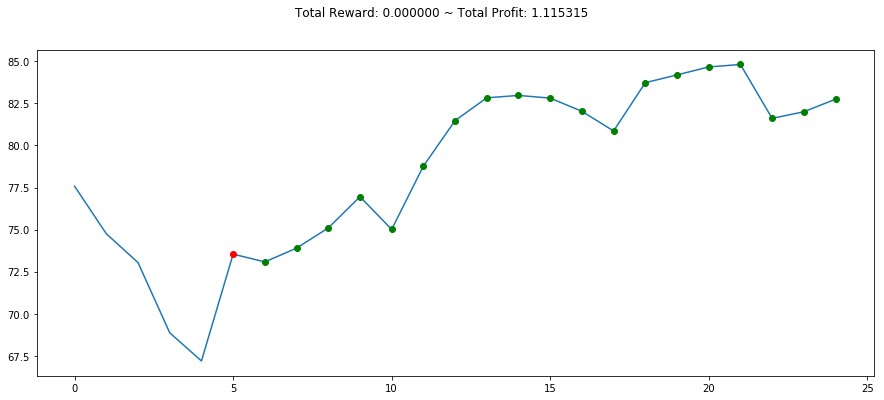

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [ ]:
!pip install finta

In [ ]:
from gym_anytrading.envs import StocksEnv
from finta import TA

In [ ]:
AMZN.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
AMZN['SMA'] = TA.SMA(AMZN, 12)
AMZN['RSI'] = TA.RSI(AMZN)
AMZN['OBV'] = TA.OBV(AMZN)
AMZN.fillna(0, inplace=True)

In [ ]:
AMZN.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV
Date,,,,,,,,,
2018-08-16,95.196999,95.250000,94.177498,94.325996,94.325996,79142000,0.0,0.000000,0.0
2018-08-17,94.290001,94.400002,92.777496,94.111000,94.111000,82086000,0.0,0.000000,-82086000.0
2018-08-20,94.528503,94.587502,93.303001,93.835503,93.835503,57240000,0.0,0.000000,-139326000.0
2018-08-21,94.000000,94.887497,93.720497,94.170998,94.170998,62112000,0.0,43.195286,-77214000.0
2018-08-22,93.832001,95.290001,93.832001,95.245003,95.245003,61610000,0.0,77.179163,-15604000.0


In [ ]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

In [ ]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=AMZN, window_size=12, frame_bound=(80,250))

In [ ]:
env2.signal_features

array([[ 7.57500000e+01,  1.14336000e+08,  8.11250006e+01,
         3.62419209e+01, -1.91653400e+09],
       [ 7.50904999e+01,  5.41520000e+07,  8.05385418e+01,
         3.52640557e+01, -1.97068600e+09],
       [ 7.62109985e+01,  1.25154000e+08,  7.98128751e+01,
         4.40489486e+01, -1.84553200e+09],
       [ 7.79004974e+01,  1.15664000e+08,  7.90900002e+01,
         4.40582335e+01, -1.72986800e+09],
       [ 8.00609970e+01,  1.69174000e+08,  7.89455001e+01,
         5.30383856e+01, -1.56069400e+09],
       [ 8.26165009e+01,  1.32264000e+08,  7.90984999e+01,
         5.26434821e+01, -1.69295800e+09],
       [ 8.33249969e+01,  1.15236000e+08,  7.93443330e+01,
         5.41049351e+01, -1.57772200e+09],
       [ 8.65000000e+01,  1.37246000e+08,  8.00666243e+01,
         6.05898913e+01, -1.44047600e+09],
       [ 8.32500000e+01,  1.73890000e+08,  8.02706242e+01,
         5.08102201e+01, -1.61436600e+09],
       [ 8.04925003e+01,  1.75788000e+08,  8.07113743e+01,
         5.32186104e+01

In [ ]:
AMZN.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV
Date,,,,,,,,,
2018-08-16,95.196999,95.250000,94.177498,94.325996,94.325996,79142000,0.0,0.000000,0.0
2018-08-17,94.290001,94.400002,92.777496,94.111000,94.111000,82086000,0.0,0.000000,-82086000.0
2018-08-20,94.528503,94.587502,93.303001,93.835503,93.835503,57240000,0.0,0.000000,-139326000.0
2018-08-21,94.000000,94.887497,93.720497,94.170998,94.170998,62112000,0.0,43.195286,-77214000.0
2018-08-22,93.832001,95.290001,93.832001,95.245003,95.245003,61610000,0.0,77.179163,-15604000.0


In [ ]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [ ]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

---------------------------------
| explained_variance | -691     |
| fps                | 16       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 0.00223  |
---------------------------------
---------------------------------
| explained_variance | 0.159    |
| fps                | 408      |
| nupdates           | 100      |
| policy_entropy     | 0.69     |
| total_timesteps    | 500      |
| value_loss         | 0.0264   |
---------------------------------
---------------------------------
| explained_variance | 0.268    |
| fps                | 471      |
| nupdates           | 200      |
| policy_entropy     | 0.688    |
| total_timesteps    | 1000     |
| value_loss         | 0.0745   |
---------------------------------
---------------------------------
| explained_variance | 0.0269   |
| fps                | 501      |
| nupdates           | 300      |
| policy_entropy     | 0.693    |
| total_timest

---------------------------------
| explained_variance | -0.578   |
| fps                | 348      |
| nupdates           | 3100     |
| policy_entropy     | 0.397    |
| total_timesteps    | 15500    |
| value_loss         | 0.0713   |
---------------------------------
---------------------------------
| explained_variance | -17.3    |
| fps                | 348      |
| nupdates           | 3200     |
| policy_entropy     | 0.0632   |
| total_timesteps    | 16000    |
| value_loss         | 0.205    |
---------------------------------
---------------------------------
| explained_variance | -0.764   |
| fps                | 349      |
| nupdates           | 3300     |
| policy_entropy     | 0.00112  |
| total_timesteps    | 16500    |
| value_loss         | 0.013    |
---------------------------------
---------------------------------
| explained_variance | -35      |
| fps                | 350      |
| nupdates           | 3400     |
| policy_entropy     | 0.209    |
| total_timest

---------------------------------
| explained_variance | -4.05    |
| fps                | 345      |
| nupdates           | 6200     |
| policy_entropy     | 0.409    |
| total_timesteps    | 31000    |
| value_loss         | 0.0794   |
---------------------------------
---------------------------------
| explained_variance | 0.00311  |
| fps                | 346      |
| nupdates           | 6300     |
| policy_entropy     | 0.375    |
| total_timesteps    | 31500    |
| value_loss         | 8.81     |
---------------------------------
---------------------------------
| explained_variance | -0.286   |
| fps                | 347      |
| nupdates           | 6400     |
| policy_entropy     | 0.413    |
| total_timesteps    | 32000    |
| value_loss         | 0.0401   |
---------------------------------
---------------------------------
| explained_variance | -0.407   |
| fps                | 348      |
| nupdates           | 6500     |
| policy_entropy     | 0.292    |
| total_timest

---------------------------------
| explained_variance | 0.855    |
| fps                | 364      |
| nupdates           | 9300     |
| policy_entropy     | 0.208    |
| total_timesteps    | 46500    |
| value_loss         | 0.0697   |
---------------------------------
---------------------------------
| explained_variance | -0.016   |
| fps                | 364      |
| nupdates           | 9400     |
| policy_entropy     | 0.37     |
| total_timesteps    | 47000    |
| value_loss         | 6.34     |
---------------------------------
---------------------------------
| explained_variance | 0.124    |
| fps                | 365      |
| nupdates           | 9500     |
| policy_entropy     | 0.38     |
| total_timesteps    | 47500    |
| value_loss         | 50.9     |
---------------------------------
---------------------------------
| explained_variance | 0.763    |
| fps                | 365      |
| nupdates           | 9600     |
| policy_entropy     | 0.218    |
| total_timest

---------------------------------
| explained_variance | 0.982    |
| fps                | 374      |
| nupdates           | 12400    |
| policy_entropy     | 0.191    |
| total_timesteps    | 62000    |
| value_loss         | 0.0709   |
---------------------------------
---------------------------------
| explained_variance | -27.7    |
| fps                | 374      |
| nupdates           | 12500    |
| policy_entropy     | 0.365    |
| total_timesteps    | 62500    |
| value_loss         | 0.101    |
---------------------------------
---------------------------------
| explained_variance | -19.6    |
| fps                | 375      |
| nupdates           | 12600    |
| policy_entropy     | 0.216    |
| total_timesteps    | 63000    |
| value_loss         | 33       |
---------------------------------
---------------------------------
| explained_variance | 0.0922   |
| fps                | 375      |
| nupdates           | 12700    |
| policy_entropy     | 0.23     |
| total_timest

---------------------------------
| explained_variance | 0.978    |
| fps                | 381      |
| nupdates           | 15500    |
| policy_entropy     | 0.0474   |
| total_timesteps    | 77500    |
| value_loss         | 0.0148   |
---------------------------------
---------------------------------
| explained_variance | 0.796    |
| fps                | 381      |
| nupdates           | 15600    |
| policy_entropy     | 0.0431   |
| total_timesteps    | 78000    |
| value_loss         | 0.295    |
---------------------------------
---------------------------------
| explained_variance | -6.56    |
| fps                | 380      |
| nupdates           | 15700    |
| policy_entropy     | 0.141    |
| total_timesteps    | 78500    |
| value_loss         | 0.474    |
---------------------------------
---------------------------------
| explained_variance | 0.362    |
| fps                | 374      |
| nupdates           | 15800    |
| policy_entropy     | 0.168    |
| total_timest

---------------------------------
| explained_variance | 0.647    |
| fps                | 367      |
| nupdates           | 18600    |
| policy_entropy     | 0.377    |
| total_timesteps    | 93000    |
| value_loss         | 0.0973   |
---------------------------------
---------------------------------
| explained_variance | 0.584    |
| fps                | 368      |
| nupdates           | 18700    |
| policy_entropy     | 0.0538   |
| total_timesteps    | 93500    |
| value_loss         | 0.0905   |
---------------------------------
---------------------------------
| explained_variance | 0.746    |
| fps                | 368      |
| nupdates           | 18800    |
| policy_entropy     | 0.038    |
| total_timesteps    | 94000    |
| value_loss         | 0.657    |
---------------------------------
---------------------------------
| explained_variance | -1.49    |
| fps                | 368      |
| nupdates           | 18900    |
| policy_entropy     | 0.14     |
| total_timest

---------------------------------
| explained_variance | 0.986    |
| fps                | 359      |
| nupdates           | 21700    |
| policy_entropy     | 0.00234  |
| total_timesteps    | 108500   |
| value_loss         | 2.15     |
---------------------------------
---------------------------------
| explained_variance | -59.7    |
| fps                | 360      |
| nupdates           | 21800    |
| policy_entropy     | 0.000676 |
| total_timesteps    | 109000   |
| value_loss         | 0.00938  |
---------------------------------
---------------------------------
| explained_variance | -112     |
| fps                | 360      |
| nupdates           | 21900    |
| policy_entropy     | 0.00279  |
| total_timesteps    | 109500   |
| value_loss         | 0.000366 |
---------------------------------
---------------------------------
| explained_variance | 0.828    |
| fps                | 360      |
| nupdates           | 22000    |
| policy_entropy     | 0.19     |
| total_timest

---------------------------------
| explained_variance | -222     |
| fps                | 360      |
| nupdates           | 24800    |
| policy_entropy     | 0.00385  |
| total_timesteps    | 124000   |
| value_loss         | 22.5     |
---------------------------------
---------------------------------
| explained_variance | 0.547    |
| fps                | 360      |
| nupdates           | 24900    |
| policy_entropy     | 0.00582  |
| total_timesteps    | 124500   |
| value_loss         | 0.0801   |
---------------------------------
---------------------------------
| explained_variance | -2.51    |
| fps                | 360      |
| nupdates           | 25000    |
| policy_entropy     | 1.37e-05 |
| total_timesteps    | 125000   |
| value_loss         | 0.133    |
---------------------------------
---------------------------------
| explained_variance | 0.757    |
| fps                | 360      |
| nupdates           | 25100    |
| policy_entropy     | 0.00933  |
| total_timest

---------------------------------
| explained_variance | 0.832    |
| fps                | 361      |
| nupdates           | 27900    |
| policy_entropy     | 0.178    |
| total_timesteps    | 139500   |
| value_loss         | 0.1      |
---------------------------------
---------------------------------
| explained_variance | 0.655    |
| fps                | 361      |
| nupdates           | 28000    |
| policy_entropy     | 0.13     |
| total_timesteps    | 140000   |
| value_loss         | 3.19     |
---------------------------------
---------------------------------
| explained_variance | 0.769    |
| fps                | 361      |
| nupdates           | 28100    |
| policy_entropy     | 0.139    |
| total_timesteps    | 140500   |
| value_loss         | 0.0126   |
---------------------------------
---------------------------------
| explained_variance | -1.37    |
| fps                | 361      |
| nupdates           | 28200    |
| policy_entropy     | 0.145    |
| total_timest

---------------------------------
| explained_variance | 0.873    |
| fps                | 359      |
| nupdates           | 31000    |
| policy_entropy     | 0.0153   |
| total_timesteps    | 155000   |
| value_loss         | 0.0588   |
---------------------------------
---------------------------------
| explained_variance | -0.0216  |
| fps                | 360      |
| nupdates           | 31100    |
| policy_entropy     | 0.253    |
| total_timesteps    | 155500   |
| value_loss         | 120      |
---------------------------------
---------------------------------
| explained_variance | 0.706    |
| fps                | 360      |
| nupdates           | 31200    |
| policy_entropy     | 0.148    |
| total_timesteps    | 156000   |
| value_loss         | 0.031    |
---------------------------------
---------------------------------
| explained_variance | 0.129    |
| fps                | 360      |
| nupdates           | 31300    |
| policy_entropy     | 0.23     |
| total_timest

---------------------------------
| explained_variance | 0.998    |
| fps                | 362      |
| nupdates           | 34100    |
| policy_entropy     | 0.0877   |
| total_timesteps    | 170500   |
| value_loss         | 0.021    |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 362      |
| nupdates           | 34200    |
| policy_entropy     | 0.0156   |
| total_timesteps    | 171000   |
| value_loss         | 0.0934   |
---------------------------------
---------------------------------
| explained_variance | 0.914    |
| fps                | 362      |
| nupdates           | 34300    |
| policy_entropy     | 0.197    |
| total_timesteps    | 171500   |
| value_loss         | 0.00673  |
---------------------------------
---------------------------------
| explained_variance | 0.178    |
| fps                | 362      |
| nupdates           | 34400    |
| policy_entropy     | 0.0448   |
| total_timest

---------------------------------
| explained_variance | 0.998    |
| fps                | 361      |
| nupdates           | 37200    |
| policy_entropy     | 0.00155  |
| total_timesteps    | 186000   |
| value_loss         | 0.00377  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 361      |
| nupdates           | 37300    |
| policy_entropy     | 0.00521  |
| total_timesteps    | 186500   |
| value_loss         | 0.000463 |
---------------------------------
---------------------------------
| explained_variance | 0.394    |
| fps                | 361      |
| nupdates           | 37400    |
| policy_entropy     | 0.0214   |
| total_timesteps    | 187000   |
| value_loss         | 0.0213   |
---------------------------------
---------------------------------
| explained_variance | 0.933    |
| fps                | 361      |
| nupdates           | 37500    |
| policy_entropy     | 0.0246   |
| total_timest

---------------------------------
| explained_variance | 0.642    |
| fps                | 361      |
| nupdates           | 40300    |
| policy_entropy     | 0.0866   |
| total_timesteps    | 201500   |
| value_loss         | 0.255    |
---------------------------------
---------------------------------
| explained_variance | 0.379    |
| fps                | 361      |
| nupdates           | 40400    |
| policy_entropy     | 0.0677   |
| total_timesteps    | 202000   |
| value_loss         | 0.0836   |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 361      |
| nupdates           | 40500    |
| policy_entropy     | 0.0875   |
| total_timesteps    | 202500   |
| value_loss         | 0.221    |
---------------------------------
---------------------------------
| explained_variance | 0.946    |
| fps                | 360      |
| nupdates           | 40600    |
| policy_entropy     | 0.0147   |
| total_timest

---------------------------------
| explained_variance | 0.999    |
| fps                | 360      |
| nupdates           | 43400    |
| policy_entropy     | 0.0762   |
| total_timesteps    | 217000   |
| value_loss         | 0.0987   |
---------------------------------
----------------------------------
| explained_variance | -1.74e+03 |
| fps                | 360       |
| nupdates           | 43500     |
| policy_entropy     | 9.54e-05  |
| total_timesteps    | 217500    |
| value_loss         | 0.0143    |
----------------------------------
---------------------------------
| explained_variance | -433     |
| fps                | 361      |
| nupdates           | 43600    |
| policy_entropy     | 0.000673 |
| total_timesteps    | 218000   |
| value_loss         | 0.000222 |
---------------------------------
---------------------------------
| explained_variance | -3.92    |
| fps                | 361      |
| nupdates           | 43700    |
| policy_entropy     | 0.0973   |
| tota

---------------------------------
| explained_variance | -0.776   |
| fps                | 363      |
| nupdates           | 46500    |
| policy_entropy     | 0.0362   |
| total_timesteps    | 232500   |
| value_loss         | 0.298    |
---------------------------------
---------------------------------
| explained_variance | 0.0783   |
| fps                | 363      |
| nupdates           | 46600    |
| policy_entropy     | 0.00019  |
| total_timesteps    | 233000   |
| value_loss         | 0.0196   |
---------------------------------
---------------------------------
| explained_variance | 0.783    |
| fps                | 363      |
| nupdates           | 46700    |
| policy_entropy     | 1.09e-06 |
| total_timesteps    | 233500   |
| value_loss         | 0.00366  |
---------------------------------
---------------------------------
| explained_variance | 0.68     |
| fps                | 363      |
| nupdates           | 46800    |
| policy_entropy     | 4.63e-05 |
| total_timest

---------------------------------
| explained_variance | 0.98     |
| fps                | 363      |
| nupdates           | 49600    |
| policy_entropy     | 0.0316   |
| total_timesteps    | 248000   |
| value_loss         | 0.0215   |
---------------------------------
---------------------------------
| explained_variance | 0.947    |
| fps                | 363      |
| nupdates           | 49700    |
| policy_entropy     | 0.075    |
| total_timesteps    | 248500   |
| value_loss         | 0.188    |
---------------------------------
---------------------------------
| explained_variance | 0.275    |
| fps                | 363      |
| nupdates           | 49800    |
| policy_entropy     | 0.143    |
| total_timesteps    | 249000   |
| value_loss         | 0.475    |
---------------------------------
---------------------------------
| explained_variance | 0.783    |
| fps                | 363      |
| nupdates           | 49900    |
| policy_entropy     | 0.0715   |
| total_timest

---------------------------------
| explained_variance | 0.341    |
| fps                | 363      |
| nupdates           | 52700    |
| policy_entropy     | 0.0353   |
| total_timesteps    | 263500   |
| value_loss         | 0.739    |
---------------------------------
---------------------------------
| explained_variance | 0.232    |
| fps                | 363      |
| nupdates           | 52800    |
| policy_entropy     | 0.16     |
| total_timesteps    | 264000   |
| value_loss         | 3.11     |
---------------------------------
---------------------------------
| explained_variance | 0.74     |
| fps                | 363      |
| nupdates           | 52900    |
| policy_entropy     | 0.207    |
| total_timesteps    | 264500   |
| value_loss         | 0.0842   |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 363      |
| nupdates           | 53000    |
| policy_entropy     | 0.00103  |
| total_timest

---------------------------------
| explained_variance | 0.989    |
| fps                | 364      |
| nupdates           | 55800    |
| policy_entropy     | 0.188    |
| total_timesteps    | 279000   |
| value_loss         | 0.000985 |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 364      |
| nupdates           | 55900    |
| policy_entropy     | 0.0147   |
| total_timesteps    | 279500   |
| value_loss         | 0.012    |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps                | 364      |
| nupdates           | 56000    |
| policy_entropy     | 0.0286   |
| total_timesteps    | 280000   |
| value_loss         | 0.0012   |
---------------------------------
---------------------------------
| explained_variance | 0.876    |
| fps                | 364      |
| nupdates           | 56100    |
| policy_entropy     | 0.0757   |
| total_timest

---------------------------------
| explained_variance | 0.999    |
| fps                | 366      |
| nupdates           | 58900    |
| policy_entropy     | 0.0146   |
| total_timesteps    | 294500   |
| value_loss         | 0.00285  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 366      |
| nupdates           | 59000    |
| policy_entropy     | 0.0134   |
| total_timesteps    | 295000   |
| value_loss         | 0.000635 |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 366      |
| nupdates           | 59100    |
| policy_entropy     | 0.00327  |
| total_timesteps    | 295500   |
| value_loss         | 0.00219  |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 366      |
| nupdates           | 59200    |
| policy_entropy     | 0.0422   |
| total_timest

---------------------------------
| explained_variance | 0.764    |
| fps                | 367      |
| nupdates           | 62000    |
| policy_entropy     | 0.15     |
| total_timesteps    | 310000   |
| value_loss         | 0.0781   |
---------------------------------
---------------------------------
| explained_variance | 0.925    |
| fps                | 367      |
| nupdates           | 62100    |
| policy_entropy     | 0.0645   |
| total_timesteps    | 310500   |
| value_loss         | 0.0278   |
---------------------------------
---------------------------------
| explained_variance | 0.941    |
| fps                | 367      |
| nupdates           | 62200    |
| policy_entropy     | 0.0359   |
| total_timesteps    | 311000   |
| value_loss         | 0.0556   |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 367      |
| nupdates           | 62300    |
| policy_entropy     | 0.0686   |
| total_timest

---------------------------------
| explained_variance | 0.991    |
| fps                | 368      |
| nupdates           | 65100    |
| policy_entropy     | 0.0114   |
| total_timesteps    | 325500   |
| value_loss         | 0.0971   |
---------------------------------
----------------------------------
| explained_variance | -2.39e+03 |
| fps                | 368       |
| nupdates           | 65200     |
| policy_entropy     | 0.000155  |
| total_timesteps    | 326000    |
| value_loss         | 0.000254  |
----------------------------------
---------------------------------
| explained_variance | -661     |
| fps                | 368      |
| nupdates           | 65300    |
| policy_entropy     | 0.000622 |
| total_timesteps    | 326500   |
| value_loss         | 0.000181 |
---------------------------------
---------------------------------
| explained_variance | -1.2e+03 |
| fps                | 368      |
| nupdates           | 65400    |
| policy_entropy     | 0.000886 |
| tota

---------------------------------
| explained_variance | 0.717    |
| fps                | 369      |
| nupdates           | 68200    |
| policy_entropy     | 0.00874  |
| total_timesteps    | 341000   |
| value_loss         | 0.0317   |
---------------------------------
---------------------------------
| explained_variance | 0.895    |
| fps                | 369      |
| nupdates           | 68300    |
| policy_entropy     | 4.53e-05 |
| total_timesteps    | 341500   |
| value_loss         | 0.000802 |
---------------------------------
---------------------------------
| explained_variance | 0.889    |
| fps                | 369      |
| nupdates           | 68400    |
| policy_entropy     | 1.01e-06 |
| total_timesteps    | 342000   |
| value_loss         | 0.000924 |
---------------------------------
---------------------------------
| explained_variance | 0.812    |
| fps                | 369      |
| nupdates           | 68500    |
| policy_entropy     | 4.01e-06 |
| total_timest

---------------------------------
| explained_variance | 0.974    |
| fps                | 371      |
| nupdates           | 71300    |
| policy_entropy     | 0.0177   |
| total_timesteps    | 356500   |
| value_loss         | 0.00198  |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 371      |
| nupdates           | 71400    |
| policy_entropy     | 0.00299  |
| total_timesteps    | 357000   |
| value_loss         | 0.00528  |
---------------------------------
---------------------------------
| explained_variance | 0.905    |
| fps                | 371      |
| nupdates           | 71500    |
| policy_entropy     | 0.066    |
| total_timesteps    | 357500   |
| value_loss         | 0.0146   |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 371      |
| nupdates           | 71600    |
| policy_entropy     | 0.0522   |
| total_timest

---------------------------------
| explained_variance | 0.982    |
| fps                | 373      |
| nupdates           | 74400    |
| policy_entropy     | 0.0288   |
| total_timesteps    | 372000   |
| value_loss         | 0.0123   |
---------------------------------
---------------------------------
| explained_variance | 0.869    |
| fps                | 373      |
| nupdates           | 74500    |
| policy_entropy     | 0.0387   |
| total_timesteps    | 372500   |
| value_loss         | 0.0105   |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 373      |
| nupdates           | 74600    |
| policy_entropy     | 0.112    |
| total_timesteps    | 373000   |
| value_loss         | 0.00457  |
---------------------------------
---------------------------------
| explained_variance | 0.806    |
| fps                | 373      |
| nupdates           | 74700    |
| policy_entropy     | 0.00167  |
| total_timest

---------------------------------
| explained_variance | -410     |
| fps                | 374      |
| nupdates           | 77500    |
| policy_entropy     | 0.122    |
| total_timesteps    | 387500   |
| value_loss         | 0.000526 |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 374      |
| nupdates           | 77600    |
| policy_entropy     | 0.0152   |
| total_timesteps    | 388000   |
| value_loss         | 0.004    |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 374      |
| nupdates           | 77700    |
| policy_entropy     | 0.00484  |
| total_timesteps    | 388500   |
| value_loss         | 0.00325  |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 374      |
| nupdates           | 77800    |
| policy_entropy     | 0.0635   |
| total_timest

---------------------------------
| explained_variance | 0.742    |
| fps                | 375      |
| nupdates           | 80600    |
| policy_entropy     | 6.28e-05 |
| total_timesteps    | 403000   |
| value_loss         | 0.0068   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 375      |
| nupdates           | 80700    |
| policy_entropy     | 0.0114   |
| total_timesteps    | 403500   |
| value_loss         | 0.000257 |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 375      |
| nupdates           | 80800    |
| policy_entropy     | 0.00042  |
| total_timesteps    | 404000   |
| value_loss         | 0.0476   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 375      |
| nupdates           | 80900    |
| policy_entropy     | 0.0232   |
| total_timest

---------------------------------
| explained_variance | 0.957    |
| fps                | 376      |
| nupdates           | 83700    |
| policy_entropy     | 0.021    |
| total_timesteps    | 418500   |
| value_loss         | 0.00368  |
---------------------------------
---------------------------------
| explained_variance | 0.944    |
| fps                | 376      |
| nupdates           | 83800    |
| policy_entropy     | 0.00512  |
| total_timesteps    | 419000   |
| value_loss         | 0.00553  |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 376      |
| nupdates           | 83900    |
| policy_entropy     | 0.0308   |
| total_timesteps    | 419500   |
| value_loss         | 0.00219  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 376      |
| nupdates           | 84000    |
| policy_entropy     | 0.019    |
| total_timest

---------------------------------
| explained_variance | 0.977    |
| fps                | 378      |
| nupdates           | 86800    |
| policy_entropy     | 0.000946 |
| total_timesteps    | 434000   |
| value_loss         | 0.00635  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 378      |
| nupdates           | 86900    |
| policy_entropy     | 0.000386 |
| total_timesteps    | 434500   |
| value_loss         | 0.0784   |
---------------------------------
----------------------------------
| explained_variance | -7.02e+07 |
| fps                | 378       |
| nupdates           | 87000     |
| policy_entropy     | 0.000173  |
| total_timesteps    | 435000    |
| value_loss         | 0.00408   |
----------------------------------
---------------------------------
| explained_variance | -248     |
| fps                | 378      |
| nupdates           | 87100    |
| policy_entropy     | 0.00122  |
| tota

---------------------------------
| explained_variance | 0.309    |
| fps                | 379      |
| nupdates           | 89900    |
| policy_entropy     | 0.00346  |
| total_timesteps    | 449500   |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.922    |
| fps                | 379      |
| nupdates           | 90000    |
| policy_entropy     | 0.000291 |
| total_timesteps    | 450000   |
| value_loss         | 0.000957 |
---------------------------------
---------------------------------
| explained_variance | 0.887    |
| fps                | 379      |
| nupdates           | 90100    |
| policy_entropy     | 0.000792 |
| total_timesteps    | 450500   |
| value_loss         | 0.000788 |
---------------------------------
---------------------------------
| explained_variance | 0.951    |
| fps                | 379      |
| nupdates           | 90200    |
| policy_entropy     | 3.1e-07  |
| total_timest

---------------------------------
| explained_variance | 0.997    |
| fps                | 380      |
| nupdates           | 93000    |
| policy_entropy     | 0.0205   |
| total_timesteps    | 465000   |
| value_loss         | 0.00081  |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 380      |
| nupdates           | 93100    |
| policy_entropy     | 0.00367  |
| total_timesteps    | 465500   |
| value_loss         | 0.00487  |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 380      |
| nupdates           | 93200    |
| policy_entropy     | 0.0517   |
| total_timesteps    | 466000   |
| value_loss         | 0.117    |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 380      |
| nupdates           | 93300    |
| policy_entropy     | 0.00444  |
| total_timest

---------------------------------
| explained_variance | 0.999    |
| fps                | 381      |
| nupdates           | 96100    |
| policy_entropy     | 0.0071   |
| total_timesteps    | 480500   |
| value_loss         | 0.00808  |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 381      |
| nupdates           | 96200    |
| policy_entropy     | 0.00186  |
| total_timesteps    | 481000   |
| value_loss         | 0.17     |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 381      |
| nupdates           | 96300    |
| policy_entropy     | 0.0385   |
| total_timesteps    | 481500   |
| value_loss         | 0.0032   |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 381      |
| nupdates           | 96400    |
| policy_entropy     | 0.00184  |
| total_timest

---------------------------------
| explained_variance | -88.5    |
| fps                | 381      |
| nupdates           | 99200    |
| policy_entropy     | 0.00203  |
| total_timesteps    | 496000   |
| value_loss         | 0.000114 |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 381      |
| nupdates           | 99300    |
| policy_entropy     | 0.105    |
| total_timesteps    | 496500   |
| value_loss         | 0.000139 |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 381      |
| nupdates           | 99400    |
| policy_entropy     | 0.00245  |
| total_timesteps    | 497000   |
| value_loss         | 0.000779 |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 381      |
| nupdates           | 99500    |
| policy_entropy     | 0.0233   |
| total_timest

---------------------------------
| explained_variance | 0.953    |
| fps                | 380      |
| nupdates           | 102300   |
| policy_entropy     | 1.52e-06 |
| total_timesteps    | 511500   |
| value_loss         | 0.00183  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 380      |
| nupdates           | 102400   |
| policy_entropy     | 0.00873  |
| total_timesteps    | 512000   |
| value_loss         | 0.000562 |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 380      |
| nupdates           | 102500   |
| policy_entropy     | 0.00067  |
| total_timesteps    | 512500   |
| value_loss         | 0.000757 |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 380      |
| nupdates           | 102600   |
| policy_entropy     | 0.0283   |
| total_timest

---------------------------------
| explained_variance | 0.998    |
| fps                | 380      |
| nupdates           | 105400   |
| policy_entropy     | 0.0126   |
| total_timesteps    | 527000   |
| value_loss         | 0.0067   |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 380      |
| nupdates           | 105500   |
| policy_entropy     | 0.0017   |
| total_timesteps    | 527500   |
| value_loss         | 0.00129  |
---------------------------------
---------------------------------
| explained_variance | 0.682    |
| fps                | 380      |
| nupdates           | 105600   |
| policy_entropy     | 0.0617   |
| total_timesteps    | 528000   |
| value_loss         | 0.0255   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 380      |
| nupdates           | 105700   |
| policy_entropy     | 0.00362  |
| total_timest

---------------------------------
| explained_variance | 0.983    |
| fps                | 379      |
| nupdates           | 108500   |
| policy_entropy     | 0.016    |
| total_timesteps    | 542500   |
| value_loss         | 0.00852  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 379      |
| nupdates           | 108600   |
| policy_entropy     | 0.0238   |
| total_timesteps    | 543000   |
| value_loss         | 0.00418  |
---------------------------------
---------------------------------
| explained_variance | -114     |
| fps                | 379      |
| nupdates           | 108700   |
| policy_entropy     | 0.000128 |
| total_timesteps    | 543500   |
| value_loss         | 0.000504 |
---------------------------------
---------------------------------
| explained_variance | -463     |
| fps                | 379      |
| nupdates           | 108800   |
| policy_entropy     | 0.003    |
| total_timest

---------------------------------
| explained_variance | 0.993    |
| fps                | 377      |
| nupdates           | 111600   |
| policy_entropy     | 0.0666   |
| total_timesteps    | 558000   |
| value_loss         | 0.0555   |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 376      |
| nupdates           | 111700   |
| policy_entropy     | 0.0066   |
| total_timesteps    | 558500   |
| value_loss         | 0.00346  |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 376      |
| nupdates           | 111800   |
| policy_entropy     | 0.00173  |
| total_timesteps    | 559000   |
| value_loss         | 0.00106  |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 376      |
| nupdates           | 111900   |
| policy_entropy     | 2e-07    |
| total_timest

---------------------------------
| explained_variance | 1        |
| fps                | 374      |
| nupdates           | 114700   |
| policy_entropy     | 0.0377   |
| total_timesteps    | 573500   |
| value_loss         | 0.000135 |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 374      |
| nupdates           | 114800   |
| policy_entropy     | 0.00275  |
| total_timesteps    | 574000   |
| value_loss         | 0.000987 |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 374      |
| nupdates           | 114900   |
| policy_entropy     | 0.0229   |
| total_timesteps    | 574500   |
| value_loss         | 0.0387   |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 374      |
| nupdates           | 115000   |
| policy_entropy     | 0.00787  |
| total_timest

---------------------------------
| explained_variance | 1        |
| fps                | 374      |
| nupdates           | 117800   |
| policy_entropy     | 0.00423  |
| total_timesteps    | 589000   |
| value_loss         | 0.000631 |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 374      |
| nupdates           | 117900   |
| policy_entropy     | 0.021    |
| total_timesteps    | 589500   |
| value_loss         | 6.37e-05 |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 374      |
| nupdates           | 118000   |
| policy_entropy     | 0.0212   |
| total_timesteps    | 590000   |
| value_loss         | 0.0047   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 374      |
| nupdates           | 118100   |
| policy_entropy     | 0.00422  |
| total_timest

----------------------------------
| explained_variance | -5.35e+03 |
| fps                | 374       |
| nupdates           | 120900    |
| policy_entropy     | 0.00163   |
| total_timesteps    | 604500    |
| value_loss         | 0.000398  |
----------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 374      |
| nupdates           | 121000   |
| policy_entropy     | 0.275    |
| total_timesteps    | 605000   |
| value_loss         | 0.00138  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 374      |
| nupdates           | 121100   |
| policy_entropy     | 0.00219  |
| total_timesteps    | 605500   |
| value_loss         | 0.001    |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 374      |
| nupdates           | 121200   |
| policy_entropy     | 0.00986  |
| tota

---------------------------------
| explained_variance | 0.989    |
| fps                | 374      |
| nupdates           | 124000   |
| policy_entropy     | 5.34e-07 |
| total_timesteps    | 620000   |
| value_loss         | 0.000357 |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 374      |
| nupdates           | 124100   |
| policy_entropy     | 0.00451  |
| total_timesteps    | 620500   |
| value_loss         | 0.000217 |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 374      |
| nupdates           | 124200   |
| policy_entropy     | 0.00447  |
| total_timesteps    | 621000   |
| value_loss         | 8.15e-05 |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 374      |
| nupdates           | 124300   |
| policy_entropy     | 0.0356   |
| total_timest

---------------------------------
| explained_variance | 0.798    |
| fps                | 375      |
| nupdates           | 127100   |
| policy_entropy     | 0.0808   |
| total_timesteps    | 635500   |
| value_loss         | 0.483    |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps                | 375      |
| nupdates           | 127200   |
| policy_entropy     | 0.114    |
| total_timesteps    | 636000   |
| value_loss         | 1.45     |
---------------------------------
---------------------------------
| explained_variance | 0.26     |
| fps                | 375      |
| nupdates           | 127300   |
| policy_entropy     | 0.0846   |
| total_timesteps    | 636500   |
| value_loss         | 0.0295   |
---------------------------------
---------------------------------
| explained_variance | 0.896    |
| fps                | 375      |
| nupdates           | 127400   |
| policy_entropy     | 0.00242  |
| total_timest

---------------------------------
| explained_variance | 0.999    |
| fps                | 375      |
| nupdates           | 130200   |
| policy_entropy     | 0.000206 |
| total_timesteps    | 651000   |
| value_loss         | 0.000126 |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 375      |
| nupdates           | 130300   |
| policy_entropy     | 0.137    |
| total_timesteps    | 651500   |
| value_loss         | 0.000256 |
---------------------------------
----------------------------------
| explained_variance | -6.54e+03 |
| fps                | 375       |
| nupdates           | 130400    |
| policy_entropy     | 0.000208  |
| total_timesteps    | 652000    |
| value_loss         | 0.000101  |
----------------------------------
----------------------------------
| explained_variance | -3.07e+03 |
| fps                | 375       |
| nupdates           | 130500    |
| policy_entropy     | 0.00282   |
|

---------------------------------
| explained_variance | 0.965    |
| fps                | 376      |
| nupdates           | 133300   |
| policy_entropy     | 0.011    |
| total_timesteps    | 666500   |
| value_loss         | 0.00139  |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 376      |
| nupdates           | 133400   |
| policy_entropy     | 0.000845 |
| total_timesteps    | 667000   |
| value_loss         | 0.000382 |
---------------------------------
---------------------------------
| explained_variance | 0.929    |
| fps                | 375      |
| nupdates           | 133500   |
| policy_entropy     | 0.00233  |
| total_timesteps    | 667500   |
| value_loss         | 0.00302  |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 375      |
| nupdates           | 133600   |
| policy_entropy     | 4.75e-07 |
| total_timest

---------------------------------
| explained_variance | 0.979    |
| fps                | 376      |
| nupdates           | 136400   |
| policy_entropy     | 0.0139   |
| total_timesteps    | 682000   |
| value_loss         | 0.00576  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 377      |
| nupdates           | 136500   |
| policy_entropy     | 0.00677  |
| total_timesteps    | 682500   |
| value_loss         | 0.00337  |
---------------------------------
---------------------------------
| explained_variance | 0.797    |
| fps                | 377      |
| nupdates           | 136600   |
| policy_entropy     | 0.026    |
| total_timesteps    | 683000   |
| value_loss         | 0.0546   |
---------------------------------
---------------------------------
| explained_variance | 0.948    |
| fps                | 377      |
| nupdates           | 136700   |
| policy_entropy     | 0.076    |
| total_timest

---------------------------------
| explained_variance | 1        |
| fps                | 378      |
| nupdates           | 139500   |
| policy_entropy     | 0.0032   |
| total_timesteps    | 697500   |
| value_loss         | 0.000395 |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 377      |
| nupdates           | 139600   |
| policy_entropy     | 0.00207  |
| total_timesteps    | 698000   |
| value_loss         | 0.00158  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 377      |
| nupdates           | 139700   |
| policy_entropy     | 0.00249  |
| total_timesteps    | 698500   |
| value_loss         | 0.00097  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 377      |
| nupdates           | 139800   |
| policy_entropy     | 0.0241   |
| total_timest

---------------------------------
| explained_variance | -611     |
| fps                | 378      |
| nupdates           | 142600   |
| policy_entropy     | 0.00218  |
| total_timesteps    | 713000   |
| value_loss         | 0.000168 |
---------------------------------
---------------------------------
| explained_variance | -655     |
| fps                | 378      |
| nupdates           | 142700   |
| policy_entropy     | 0.252    |
| total_timesteps    | 713500   |
| value_loss         | 0.000214 |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 378      |
| nupdates           | 142800   |
| policy_entropy     | 0.0141   |
| total_timesteps    | 714000   |
| value_loss         | 0.000394 |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 378      |
| nupdates           | 142900   |
| policy_entropy     | 0.0048   |
| total_timest

---------------------------------
| explained_variance | 0.998    |
| fps                | 379      |
| nupdates           | 145700   |
| policy_entropy     | 1.69e-07 |
| total_timesteps    | 728500   |
| value_loss         | 0.000106 |
---------------------------------
---------------------------------
| explained_variance | 0.929    |
| fps                | 380      |
| nupdates           | 145800   |
| policy_entropy     | 0.00124  |
| total_timesteps    | 729000   |
| value_loss         | 0.000638 |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 380      |
| nupdates           | 145900   |
| policy_entropy     | 0.00773  |
| total_timesteps    | 729500   |
| value_loss         | 0.00843  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 380      |
| nupdates           | 146000   |
| policy_entropy     | 0.00363  |
| total_timest

---------------------------------
| explained_variance | 0.983    |
| fps                | 382      |
| nupdates           | 148800   |
| policy_entropy     | 0.0635   |
| total_timesteps    | 744000   |
| value_loss         | 0.00546  |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 382      |
| nupdates           | 148900   |
| policy_entropy     | 0.0154   |
| total_timesteps    | 744500   |
| value_loss         | 0.00292  |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 382      |
| nupdates           | 149000   |
| policy_entropy     | 0.0142   |
| total_timesteps    | 745000   |
| value_loss         | 0.00335  |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 382      |
| nupdates           | 149100   |
| policy_entropy     | 0.00695  |
| total_timest

---------------------------------
| explained_variance | 0.989    |
| fps                | 385      |
| nupdates           | 151900   |
| policy_entropy     | 0.00609  |
| total_timesteps    | 759500   |
| value_loss         | 0.00721  |
---------------------------------
---------------------------------
| explained_variance | 0.845    |
| fps                | 385      |
| nupdates           | 152000   |
| policy_entropy     | 0.0038   |
| total_timesteps    | 760000   |
| value_loss         | 0.0237   |
---------------------------------
---------------------------------
| explained_variance | nan      |
| fps                | 385      |
| nupdates           | 152100   |
| policy_entropy     | 0.000305 |
| total_timesteps    | 760500   |
| value_loss         | 0.00054  |
---------------------------------
----------------------------------
| explained_variance | -2.56e+06 |
| fps                | 385       |
| nupdates           | 152200    |
| policy_entropy     | 0.000256  |
| total_t

---------------------------------
| explained_variance | 0.993    |
| fps                | 387      |
| nupdates           | 155000   |
| policy_entropy     | 0.00788  |
| total_timesteps    | 775000   |
| value_loss         | 0.00107  |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 387      |
| nupdates           | 155100   |
| policy_entropy     | 0.00722  |
| total_timesteps    | 775500   |
| value_loss         | 0.000192 |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 387      |
| nupdates           | 155200   |
| policy_entropy     | 1.3e-06  |
| total_timesteps    | 776000   |
| value_loss         | 0.000205 |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 388      |
| nupdates           | 155300   |
| policy_entropy     | 4.06e-07 |
| total_timest

---------------------------------
| explained_variance | 0.841    |
| fps                | 390      |
| nupdates           | 158100   |
| policy_entropy     | 0.112    |
| total_timesteps    | 790500   |
| value_loss         | 0.0702   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 390      |
| nupdates           | 158200   |
| policy_entropy     | 0.00939  |
| total_timesteps    | 791000   |
| value_loss         | 0.000245 |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 390      |
| nupdates           | 158300   |
| policy_entropy     | 0.00486  |
| total_timesteps    | 791500   |
| value_loss         | 0.00023  |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 390      |
| nupdates           | 158400   |
| policy_entropy     | 0.0397   |
| total_timest

---------------------------------
| explained_variance | 0.999    |
| fps                | 392      |
| nupdates           | 161200   |
| policy_entropy     | 0.0118   |
| total_timesteps    | 806000   |
| value_loss         | 0.00158  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 392      |
| nupdates           | 161300   |
| policy_entropy     | 0.0026   |
| total_timesteps    | 806500   |
| value_loss         | 0.0185   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 392      |
| nupdates           | 161400   |
| policy_entropy     | 0.0422   |
| total_timesteps    | 807000   |
| value_loss         | 0.00103  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 392      |
| nupdates           | 161500   |
| policy_entropy     | 0.00686  |
| total_timest

----------------------------------
| explained_variance | -1.06e+03 |
| fps                | 394       |
| nupdates           | 164300    |
| policy_entropy     | 0.00158   |
| total_timesteps    | 821500    |
| value_loss         | 0.00139   |
----------------------------------
----------------------------------
| explained_variance | -2.13e+03 |
| fps                | 395       |
| nupdates           | 164400    |
| policy_entropy     | 0.00451   |
| total_timesteps    | 822000    |
| value_loss         | 0.000806  |
----------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 395      |
| nupdates           | 164500   |
| policy_entropy     | 0.0751   |
| total_timesteps    | 822500   |
| value_loss         | 0.029    |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 395      |
| nupdates           | 164600   |
| policy_entropy     | 0.00522  

---------------------------------
| explained_variance | 0.964    |
| fps                | 396      |
| nupdates           | 167300   |
| policy_entropy     | 0.00481  |
| total_timesteps    | 836500   |
| value_loss         | 0.000279 |
---------------------------------
---------------------------------
| explained_variance | 0.905    |
| fps                | 397      |
| nupdates           | 167400   |
| policy_entropy     | 1.6e-06  |
| total_timesteps    | 837000   |
| value_loss         | 0.00957  |
---------------------------------
---------------------------------
| explained_variance | 0.931    |
| fps                | 397      |
| nupdates           | 167500   |
| policy_entropy     | 3.71e-06 |
| total_timesteps    | 837500   |
| value_loss         | 0.000437 |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 397      |
| nupdates           | 167600   |
| policy_entropy     | 0.00518  |
| total_timest

---------------------------------
| explained_variance | 0.978    |
| fps                | 399      |
| nupdates           | 170400   |
| policy_entropy     | 0.00304  |
| total_timesteps    | 852000   |
| value_loss         | 0.0133   |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps                | 399      |
| nupdates           | 170500   |
| policy_entropy     | 0.119    |
| total_timesteps    | 852500   |
| value_loss         | 0.00127  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 399      |
| nupdates           | 170600   |
| policy_entropy     | 0.0193   |
| total_timesteps    | 853000   |
| value_loss         | 0.0114   |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps                | 399      |
| nupdates           | 170700   |
| policy_entropy     | 0.0205   |
| total_timest

---------------------------------
| explained_variance | -16      |
| fps                | 401      |
| nupdates           | 173500   |
| policy_entropy     | 0.00374  |
| total_timesteps    | 867500   |
| value_loss         | 0.755    |
---------------------------------
---------------------------------
| explained_variance | 0.529    |
| fps                | 401      |
| nupdates           | 173600   |
| policy_entropy     | 0.113    |
| total_timesteps    | 868000   |
| value_loss         | 3.36     |
---------------------------------
---------------------------------
| explained_variance | 0.192    |
| fps                | 401      |
| nupdates           | 173700   |
| policy_entropy     | 0.18     |
| total_timesteps    | 868500   |
| value_loss         | 0.0689   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 401      |
| nupdates           | 173800   |
| policy_entropy     | 0.0819   |
| total_timest

---------------------------------
| explained_variance | 0.997    |
| fps                | 403      |
| nupdates           | 176600   |
| policy_entropy     | 0.0208   |
| total_timesteps    | 883000   |
| value_loss         | 0.00501  |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 403      |
| nupdates           | 176700   |
| policy_entropy     | 0.00658  |
| total_timesteps    | 883500   |
| value_loss         | 0.00107  |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 403      |
| nupdates           | 176800   |
| policy_entropy     | 0.0164   |
| total_timesteps    | 884000   |
| value_loss         | 0.00031  |
---------------------------------
---------------------------------
| explained_variance | 0.537    |
| fps                | 404      |
| nupdates           | 176900   |
| policy_entropy     | 0.000833 |
| total_timest

---------------------------------
| explained_variance | 0.999    |
| fps                | 406      |
| nupdates           | 179700   |
| policy_entropy     | 0.000447 |
| total_timesteps    | 898500   |
| value_loss         | 0.00303  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 406      |
| nupdates           | 179800   |
| policy_entropy     | 0.00822  |
| total_timesteps    | 899000   |
| value_loss         | 0.00111  |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 406      |
| nupdates           | 179900   |
| policy_entropy     | 0.0147   |
| total_timesteps    | 899500   |
| value_loss         | 0.00146  |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 406      |
| nupdates           | 180000   |
| policy_entropy     | 0.00441  |
| total_timest

---------------------------------
| explained_variance | 0.993    |
| fps                | 408      |
| nupdates           | 182800   |
| policy_entropy     | 0.000409 |
| total_timesteps    | 914000   |
| value_loss         | 0.00054  |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 408      |
| nupdates           | 182900   |
| policy_entropy     | 0.00462  |
| total_timesteps    | 914500   |
| value_loss         | 0.00144  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 408      |
| nupdates           | 183000   |
| policy_entropy     | 0.025    |
| total_timesteps    | 915000   |
| value_loss         | 0.0018   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 408      |
| nupdates           | 183100   |
| policy_entropy     | 0.00314  |
| total_timest

---------------------------------
| explained_variance | nan      |
| fps                | 410      |
| nupdates           | 185900   |
| policy_entropy     | 0.000139 |
| total_timesteps    | 929500   |
| value_loss         | 0.000539 |
---------------------------------
---------------------------------
| explained_variance | -247     |
| fps                | 410      |
| nupdates           | 186000   |
| policy_entropy     | 0.000103 |
| total_timesteps    | 930000   |
| value_loss         | 9.36e-05 |
---------------------------------
---------------------------------
| explained_variance | -372     |
| fps                | 410      |
| nupdates           | 186100   |
| policy_entropy     | 0.00126  |
| total_timesteps    | 930500   |
| value_loss         | 0.00027  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 410      |
| nupdates           | 186200   |
| policy_entropy     | 0.253    |
| total_timest

---------------------------------
| explained_variance | 0.98     |
| fps                | 412      |
| nupdates           | 189000   |
| policy_entropy     | 2.91e-06 |
| total_timesteps    | 945000   |
| value_loss         | 0.00139  |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 412      |
| nupdates           | 189100   |
| policy_entropy     | 2.88e-07 |
| total_timesteps    | 945500   |
| value_loss         | 0.000269 |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 412      |
| nupdates           | 189200   |
| policy_entropy     | 3.07e-07 |
| total_timesteps    | 946000   |
| value_loss         | 0.000164 |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 412      |
| nupdates           | 189300   |
| policy_entropy     | 0.0874   |
| total_timest

---------------------------------
| explained_variance | 0.997    |
| fps                | 413      |
| nupdates           | 192100   |
| policy_entropy     | 0.014    |
| total_timesteps    | 960500   |
| value_loss         | 0.000794 |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 413      |
| nupdates           | 192200   |
| policy_entropy     | 0.0612   |
| total_timesteps    | 961000   |
| value_loss         | 0.00206  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 413      |
| nupdates           | 192300   |
| policy_entropy     | 0.0103   |
| total_timesteps    | 961500   |
| value_loss         | 0.00216  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 413      |
| nupdates           | 192400   |
| policy_entropy     | 9.72e-05 |
| total_timest

---------------------------------
| explained_variance | 0.999    |
| fps                | 415      |
| nupdates           | 195200   |
| policy_entropy     | 0.00326  |
| total_timesteps    | 976000   |
| value_loss         | 0.00616  |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps                | 415      |
| nupdates           | 195300   |
| policy_entropy     | 0.00397  |
| total_timesteps    | 976500   |
| value_loss         | 0.00176  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 415      |
| nupdates           | 195400   |
| policy_entropy     | 0.000793 |
| total_timesteps    | 977000   |
| value_loss         | 0.000346 |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 415      |
| nupdates           | 195500   |
| policy_entropy     | 0.0382   |
| total_timest

---------------------------------
| explained_variance | 0.999    |
| fps                | 417      |
| nupdates           | 198300   |
| policy_entropy     | 0.00506  |
| total_timesteps    | 991500   |
| value_loss         | 0.0316   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 417      |
| nupdates           | 198400   |
| policy_entropy     | 0.00891  |
| total_timesteps    | 992000   |
| value_loss         | 0.0236   |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 417      |
| nupdates           | 198500   |
| policy_entropy     | 0.0333   |
| total_timesteps    | 992500   |
| value_loss         | 0.0216   |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 417      |
| nupdates           | 198600   |
| policy_entropy     | 0.00371  |
| total_timest

In [ ]:
env = MyCustomEnv(df=AMZN, window_size=12, frame_bound=(80,250))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 35.934486389160156, 'total_profit': 0.9784790370203446, 'position': 1}


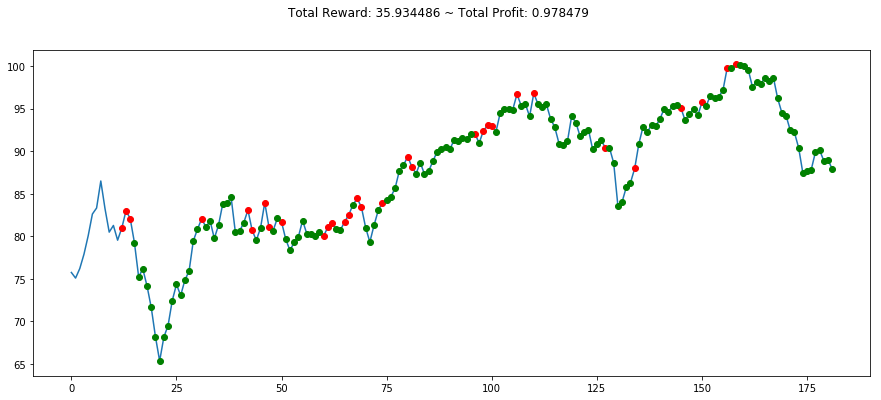

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()